# PROJECT 1 


## Predictive Maintenance Dataset

### Identifying Operational Thresholds for Predictive Maintenance: A Failure Analysis Approach”


### How can industrial operators reduce unplanned downtime and extend machine life by analyzing machine performance data and identifying early signs of mechanical failure

In [1163]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [1164]:
df=pd.read_csv(r"/Users/turfdiddy/Desktop/Bootcamp_ds:ml/Week_3/Project/ai4i2020.csv")

## General Data Exploration and Cleaning

In [1165]:
#The first step in the cleaning process here involved using the head() function which gives a general overview of what the dataset looks like and consists of.
#This displays only the first 5 rows which helps in quickly brushing over the data within the first few columns and all the rows without being too overwhelming
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [1166]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [1167]:
#The shape function used here helps in seeing the total number of rows and columns being worked with in this dataset. The info function gives a more detailed explanation of the dataset in its entirety.
#Here we can observe the various values within each colunn to see the various types of data within each column. We can observe here that the dataset primarily consists of int64 and float64 values with an exception to 
#the columns Product ID and Type where the values are objects in other words strings. In order to work with these columns ie merge or join wih other columns would have to be converted into to int64 or float64 datatypes'''
df.shape

(10000, 14)

In [1168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [1169]:
#This was to check if any columns included any Null values. Thankfully this dataset doesnt include any Null values
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [1170]:
#The duplicate function helps in determining if any rows repeat themselves within the dataframe. In this case we dont have any of that sort
df.duplicated().sum()

0

In [1171]:
#With regards to the object datatypes within the dataset ie Type and Product ID , the unique function helps determine the various unique values that can be found within the column. Here we can observe L M and H
df.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

In [1172]:
#To be sure there are not any other missing values that were cut out in the truncated dataset above , the value_counts function was used here to count the amount of the various values within the column.
#This printed out the 3 main values within the column and confirms L M and H are the only values within the column
df["Type"].unique

<bound method Series.unique of 0       M
1       L
2       L
3       L
4       L
       ..
9995    M
9996    H
9997    M
9998    H
9999    M
Name: Type, Length: 10000, dtype: object>

In [1173]:
df["Type"].value_counts()

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64

In [1174]:
#The same step was carried out for Product ID to see what the various values include. Here we can observe an array of the various values
df["Product ID"].unique()

array(['M14860', 'L47181', 'L47182', ..., 'M24857', 'H39412', 'M24859'],
      dtype=object)

In [1175]:
#The value counts show every Product ID as a unique value each with a corresponding Type L M or H
df["Product ID"].value_counts()

Product ID
M14860    1
L53850    1
L53843    1
L53844    1
L53845    1
         ..
M18193    1
M18194    1
L50515    1
L50516    1
M24859    1
Name: count, Length: 10000, dtype: int64

In [1176]:
#In order to. potentially work with these 2 columns , they would have to be transforned into numerical datatypes ie int64 or float64. The approach used here was to assign numerical values to L M and H.
#For the Product ID , the slice function was used to slice the first letter from the Product ID value leaving only the numerical values.The astype function is then used to convert the numerical value which is still 
#a string into the datatype integer '''

df['Type_numerical'] = df['Type'].map({'L': 0, 'M': 1, 'H': 2})
df['Product_ID_numerical'] = df['Product ID'].str[1:].astype(int)

In [1177]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_numerical,Product_ID_numerical
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,1,14860
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,0,47181
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,0,47182
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,0,47183
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,0,47184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0,1,24855
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0,2,39410
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0,1,24857
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0,2,39412


In [1178]:
#At a glance it looks like the machine Failure column contains only zeros. I checked this by using isnull to verify if there are any null values here. This in turn returned the False from the boolean interpretation which means
#all the rows are filled with a value which is most likely zero

df['Machine failure'].isnull().sum()

0

In [1179]:
#To double check and verify this i used another boolean function operator on the column to check if all the rows within the column machine failure have a zero
(df['Machine failure'] == 0).all()

False

In [1180]:
df['Machine failure'].unique()

array([0, 1])

In [1181]:
df['Machine failure'].describe()

count    10000.000000
mean         0.033900
std          0.180981
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Machine failure, dtype: float64

In [1182]:
#This goes to show that not all the rows within the Machine Failure column is 0. After careful reading of the dataset description,I later realized that the Machine Failure column has a binary value of 0 and 1.
#If at least one of the failure modes is true the process fails and the machine failure label is set to 1. This means under the machine failure column every value of 1 represents a machine failure

#The next step here was to separate both data frames where df_failures represent all scenarios where the machine failed '''

In [1183]:
df_failures = df[df['Machine failure'] == 1]

print(df_failures)

print(f"Total number of failure events: {len(df_failures)}")

       UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
50      51     L47230    L                298.9                    309.1   
69      70     L47249    L                298.9                    309.0   
77      78     L47257    L                298.8                    308.9   
160    161     L47340    L                298.4                    308.2   
161    162     L47341    L                298.3                    308.1   
...    ...        ...  ...                  ...                      ...   
9758  9759     L56938    L                298.6                    309.8   
9764  9765     L56944    L                298.5                    309.5   
9822  9823     L57002    L                298.5                    309.4   
9830  9831     L57010    L                298.3                    309.3   
9974  9975     L57154    L                298.6                    308.2   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  \
50      

In [1184]:
df_failures

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_numerical,Product_ID_numerical
50,51,L47230,L,298.9,309.1,2861,4.6,143,1,0,0,1,0,0,0,47230
69,70,L47249,L,298.9,309.0,1410,65.7,191,1,0,0,1,1,0,0,47249
77,78,L47257,L,298.8,308.9,1455,41.3,208,1,1,0,0,0,0,0,47257
160,161,L47340,L,298.4,308.2,1282,60.7,216,1,0,0,0,1,0,0,47340
161,162,L47341,L,298.3,308.1,1412,52.3,218,1,0,0,0,1,0,0,47341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9758,9759,L56938,L,298.6,309.8,2271,16.2,218,1,1,0,0,0,0,0,56938
9764,9765,L56944,L,298.5,309.5,1294,66.7,12,1,0,0,1,0,0,0,56944
9822,9823,L57002,L,298.5,309.4,1360,60.9,187,1,0,0,0,1,0,0,57002
9830,9831,L57010,L,298.3,309.3,1337,56.1,206,1,0,0,0,1,0,0,57010


In [1185]:
#df_success refers to the dataset of machine success'''
df_success= df[df['Machine failure'] == 0]

print(df_success)

print(f"Total number of successful events: {len(df_success)}")

        UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure

In [1186]:
df.to_csv("cleaned_data_predictive_maintenance.csv", index=False)

In [1187]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_numerical,Product_ID_numerical
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,1,14860
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,0,47181
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,0,47182
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,0,47183
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,0,47184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0,1,24855
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0,2,39410
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0,1,24857
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0,2,39412


## Failure Analysis-Univariate 

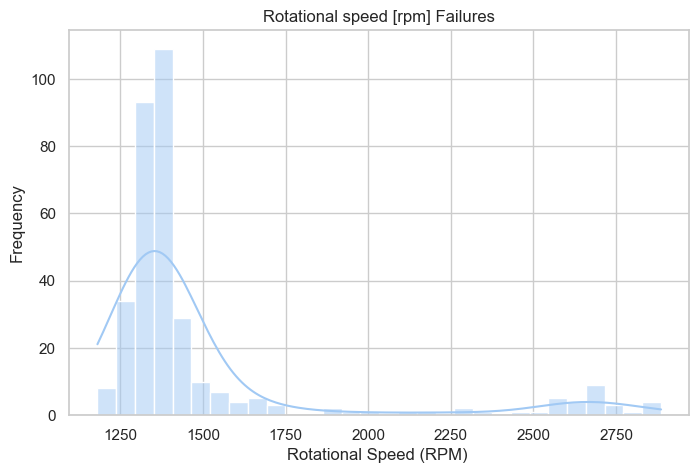

In [1188]:
#The first step here is to perform various univariate analysis on the different operation columns ie variables namely, air temp,process temp,torque rotational speed and tool wear
#Starting first air rotational speed
plt.figure(figsize=(8, 5))
sns.histplot(df_failures["Rotational speed [rpm]"], kde=True, bins=30)
plt.title("Rotational speed [rpm] Failures")
plt.xlabel("Rotational Speed (RPM) ")
plt.ylabel("Frequency")
plt.show()

Insight:

- Risk Zone Identification: Machines operating consistently around 1350 RPM may be more vulnerable to failure. This suggests that prolonged operation at low-to-mid RPMs might create mechanical stress or 
- inefficiencies.

- Preventive Maintenance Strategy: It may be beneficial to monitor and inspect machines that operate mostly in the 1200–1500 RPM range more frequently.

- Threshold Definition: You could define a risk threshold for rotational speed (e.g., flag machines with >70% of their time between 1300–1500 RPM) for early warning systems


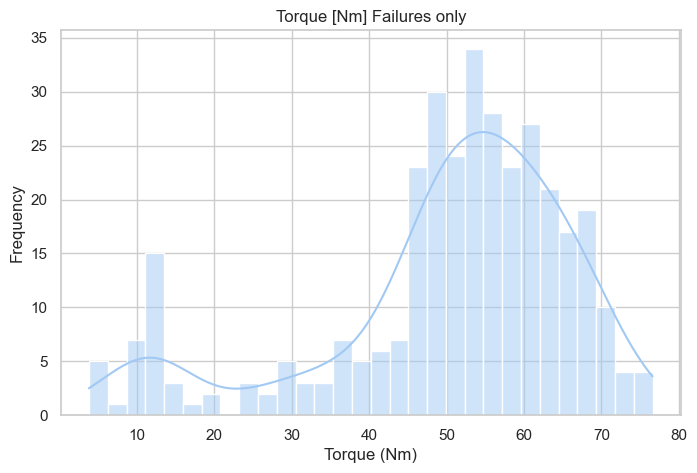

In [1189]:
#Next we move on to torque
plt.figure(figsize=(8, 5))
sns.histplot(df_failures['Torque [Nm]'], kde=True, bins=30)
plt.title("Torque [Nm] Failures only")
plt.xlabel("Torque (Nm)")
plt.ylabel("Frequency")
plt.show()

Insight:

- Torque as a Strong Predictor: Machines operating in the 50–65 Nm torque range show a high likelihood of failure, making this range a key risk threshold.

- Maintenance Strategy: Components subjected to prolonged or frequent high-torque loads (e.g., ≥ 50 Nm) should be prioritized for preventive maintenance or design improvements.

- Potential Alert System: A warning system could be implemented such that a warning is raised when Torque exceeds 50 Nm for more that X minutes to catch failure risks

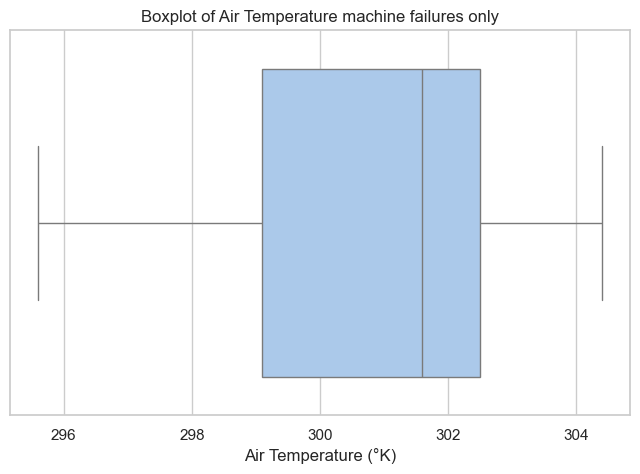

In [1190]:
#Next we move on to the next operational variable air temperature

plt.figure(figsize=(8, 5))
sns.boxplot(x=df_failures['Air temperature [K]'])
plt.title("Boxplot of Air Temperature machine failures only")
plt.xlabel("Air Temperature (°K)")
plt.show()

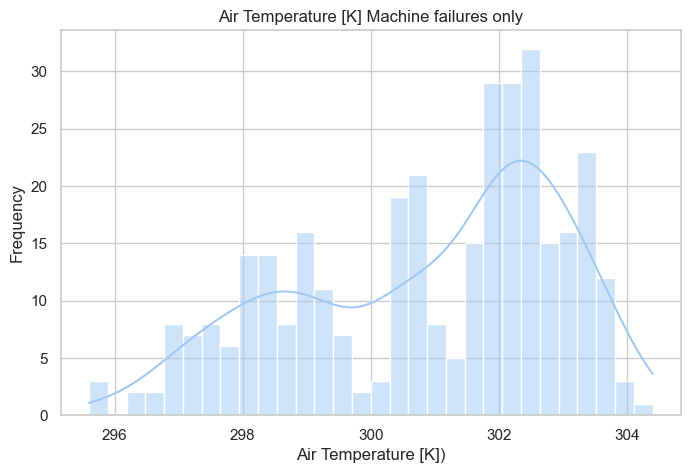

In [1191]:
plt.figure(figsize=(8, 5))
sns.histplot(df_failures['Air temperature [K]'], kde=True, bins=30)
plt.title("Air Temperature [K] Machine failures only")
plt.xlabel("Air Temperature [K])")
plt.ylabel("Frequency")
plt.show()

Insight:

- Air Temperature as a Failure Risk Factor:
There is a clear concentration of failures in higher temperature zones (especially ≥ 300 K).

- This could indicate overheating, poor ventilation, or climate sensitivity of machine components.

- Preventive Action:
Machines operating in environments above 300 K (27°C) may require cooling systems or more frequent maintenance.

- Setting up temperature monitoring alerts for thresholds like 301 K or 302 K.
- Design or Process Implication:
If failures are tied to external air temperature, manufacturing plants in hotter regions may face greater maintenance demands.

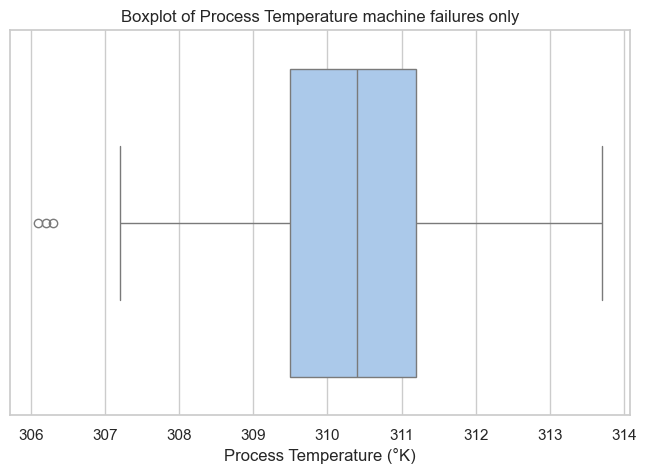

In [1192]:
#Next operatiopnal variable process temperature
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_failures['Process temperature [K]'])
plt.title("Boxplot of Process Temperature machine failures only")
plt.xlabel("Process Temperature (°K)")
plt.show()

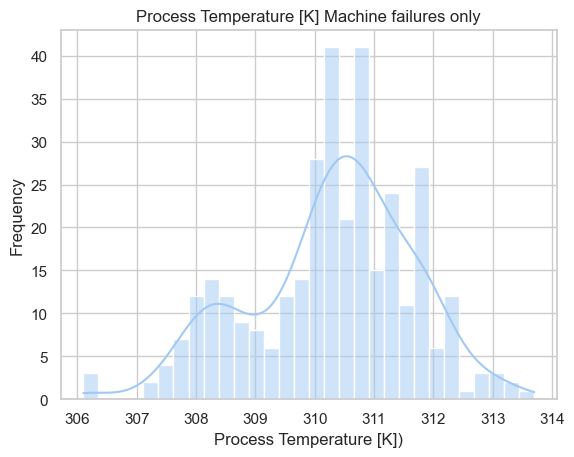

In [1193]:
sns.histplot(df_failures['Process temperature [K]'], kde=True, bins=30)
plt.title("Process Temperature [K] Machine failures only")
plt.xlabel("Process Temperature [K])")
plt.ylabel("Frequency")
plt.show()

Insight:

- Process Temperature as a Sensitive Variable:
There’s a clear failure hotspot around 310–311 K (≈37°C–38°C), which may represent optimal conditions for stress or friction that causes system breakdowns.

- Process Control Recommendations:

- Machines should be closely monitored if the process temperature approaches 310 K.
Consider adjusting process parameters (e.g., cooling rates, heat sinks) to avoid operating in this failure-prone range.

- Engineering & Design Considerations:

This insight could indicate the need to re-evaluate thermal limits of machine components.
For production settings, implementing thermal alerts at or above 310 K could improve preventive maintenance.

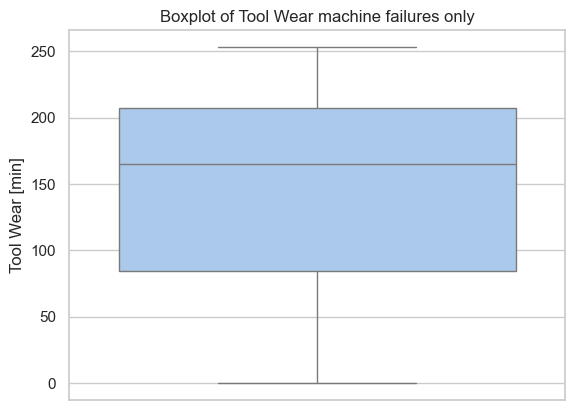

In [1194]:
#Next opeartional variable

sns.boxplot(y=df_failures['Tool wear [min]'])
plt.title("Boxplot of Tool Wear machine failures only")
plt.ylabel("Tool Wear [min]")
plt.show()

Insight:

- High tool wear is associated with failure: The median and upper quartile values are quite high, suggesting that a significant portion of failures occur when tool wear exceeds 170–210 minutes.

- Preventive maintenance opportunity:

- To reduce machine failures, you might consider setting a preventive maintenance threshold around 150–170 minutes of tool wear. Servicing or replacing tools before this point could prevent many failures.

In [1195]:
#After conducting the univariate analysis on all the operational Variables the next step is a general visualisation of success vs failures

#The main goal from here is to use visualizations to and summary statistics to find patterns and differences between the success and failure data. The dataset has been filtered to s
#separate the failures from the successes , however an analysis and comparison of both is essential for the main goal.
#The most critical part here is the direct comparison between normal operations and failures

#The first step here is to have a feel of what the overall Failure rate is and visualise this. To do this we calculate the percentage of failures in the entire dataset 
#and visualise this with a barchart

In [1196]:
failure_percentage = ((df['Machine failure'] == 1).sum() / len(df)) * 100

In [1197]:
failure_percentage


3.39

In [1198]:
#The first analysis being made here is the Overall Failure Rate within the entire dataset. This is to give a feel of what percentage of failures occured and what percentage of successes
#occurred. the barplot is used here because it gives as more control and dataset manipulation as compared to the countplot.

#failure_percentage gives as an overview of the rate of failures and successes within the dataset. The binary value under Machine failure 0 represents 
#a success where as 1 represents a failure. This is then visualized with a barplot. The dataframe failure_df is created in order to use the barplot. 
#The columns Failure_Status and Percentage are then inserted into dataframe and the Failure Status column is mapped to be the labels on the chart 


In [1199]:

failure_percentages = df['Machine failure'].value_counts(normalize=True).sort_index() * 100
failure_df = failure_percentages.reset_index()
failure_df.columns = ['Failure_Status', 'Percentage']
failure_df['Failure_Status'] = failure_df['Failure_Status'].map({0: 'No Failure', 1: 'Failure'})


In [1200]:
failure_df


,Failure_Status,Percentage
0,No Failure,96.61
1,Failure,3.39


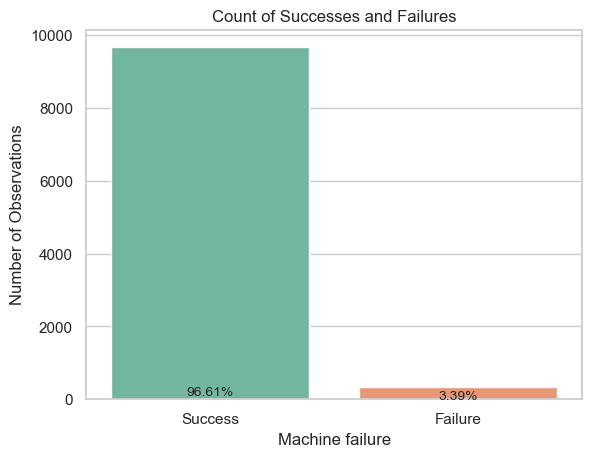

In [1201]:
# Graph of overall machine success and failures

sns.countplot(x='Machine failure', hue='Machine failure', legend= False,data=df, palette='Set2')
plt.title("Count of Successes and Failures")

for rate, val in enumerate(failure_percentages.values):
    plt.text(rate, val + 1, f"{val:.2f}%", ha='center', fontsize=10)

plt.ylabel("Number of Observations")
plt.xticks([0, 1], ['Success', 'Failure'])  
plt.show()

In [1202]:
#The next step is to evaluate the 5 different kinds of Failures and see what the most occuring ones are

df_failures[['TWF','HDF','PWF','OSF','RNF']].value_counts()

TWF  HDF  PWF  OSF  RNF
0    1    0    0    0      106
     0    1    0    0       80
          0    1    0       78
1    0    0    0    0       42
0    0    1    1    0       11
          0    0    0        9
     1    0    1    0        6
          1    0    0        3
1    0    0    1    0        2
               0    1        1
          1    1    0        1
Name: count, dtype: int64

In [1203]:
df_failures[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].apply(pd.value_counts)

/var/folders/24/ngr8p82d5634jzq4nx8yv96c0000gn/T/ipykernel_4139/4255000806.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  df_failures[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].apply(pd.value_counts)


,TWF,HDF,PWF,OSF,RNF
0,293,224,244,241,338
1,46,115,95,98,1


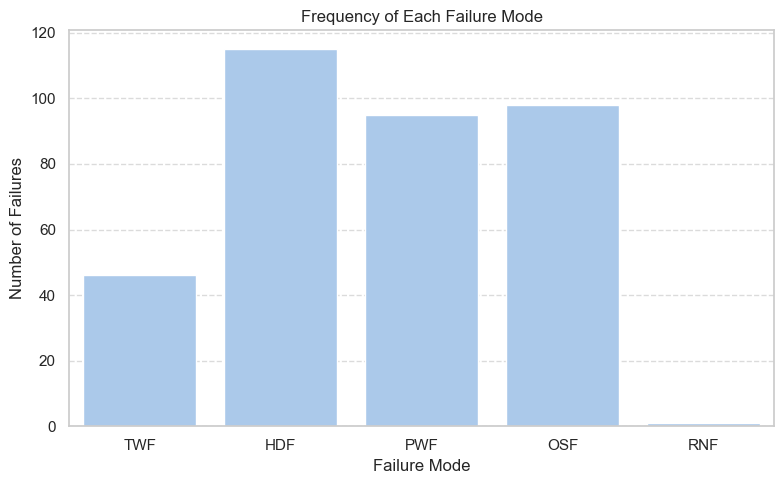

In [1204]:
#The next step is to visualize the various failures to determine the most occuring out of the various modes. This was done by using a barplot to visualize
#the frequency of each failure mode within their individual columns.
#Failure counts here refer to the dataframe consisting of the columns of the various failure modes '''

failure_counts = df_failures[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].sum()
failure_df = failure_counts.reset_index()
failure_df.columns = ['Failure Type', 'Count']

sns.set_palette('pastel')
plt.figure(figsize=(8, 5))
sns.barplot(x='Failure Type', y='Count', data=failure_df)

plt.title('Frequency of Each Failure Mode')
plt.xlabel('Failure Mode')
plt.ylabel('Number of Failures')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Analysis and Insights

HDF Should Be Prioritized:
The disproportionately high number of heat-related failures implies a need for thermal performance review and cooling system inspection.

Preventive Maintenance Planning:
OSF and PWF are next in line for intervention. Consider load balancing, stress-reducing operational strategies, and power supply audits.

Tool Wear Monitoring:
While TWF isn’t leading, integrating predictive maintenance for tooling systems could help avoid late-stage wear-related issues.

In [1205]:
#The nextstep here is to figure out what operational conditions existed at each individual 
#failure mode. There are 5 individual failure modes within the dataset. This resulted in 5 individual 
#dataframes each specific to different failure modes'''

In [1206]:
tool_wear_failures = df[df['TWF'] == 1]

In [1207]:
tool_wear_failures

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_numerical,Product_ID_numerical
77,78,L47257,L,298.8,308.9,1455,41.3,208,1,1,0,0,0,0,0,47257
1087,1088,H30501,H,296.9,307.8,1549,35.8,206,1,1,0,0,0,0,2,30501
1509,1510,L48689,L,298.0,308.5,1429,37.7,220,1,1,0,0,0,0,0,48689
1682,1683,H31096,H,297.9,307.4,1604,36.1,225,1,1,0,0,0,0,2,31096
1763,1764,L48943,L,298.2,307.6,1511,31.0,209,1,1,0,0,0,0,0,48943
1996,1997,M16856,M,298.4,308.0,1416,38.2,198,1,1,0,0,0,0,1,16856
2166,2167,M17026,M,299.6,309.2,1867,23.4,225,1,1,0,0,0,0,1,17026
2244,2245,M17104,M,299.3,308.4,1542,37.5,203,1,1,0,0,0,0,1,17104
2671,2672,M17531,M,299.7,309.3,1399,41.9,221,1,1,0,0,0,0,1,17531
2864,2865,H32278,H,300.6,309.4,1380,47.6,246,1,1,0,0,0,0,2,32278


In [1208]:
heat_dissipation_failures=df[df['HDF']==1]

In [1209]:
power_failures=df[df['PWF']==1]

In [1210]:
overstrain_failures=df[df['OSF']==1]

In [1211]:
random_failures=df[df['RNF']==1]

In [1212]:
#In order to fully observe the operational variables within each of the failures , I used to describe function 
#to describe the values within these operational columns '''

In [1213]:
tool_wear_failures[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']].describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,46.000000,46.000000,46.000000,46.000000,46.000000
mean,300.297826,310.165217,1566.173913,37.836957,216.369565
std,1.945992,1.484021,205.768511,10.277232,12.257168
min,296.900000,307.400000,1323.000000,16.200000,198.000000
25%,298.650000,308.975000,1423.750000,30.625000,207.000000
50%,300.450000,310.250000,1516.000000,37.750000,214.500000
75%,301.775000,311.225000,1625.500000,45.075000,224.250000
max,304.400000,313.700000,2271.000000,65.300000,253.000000


In [1214]:
heat_dissipation_failures[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']].describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,115.000000,115.000000,115.000000,115.000000,115.000000
mean,302.560870,310.788696,1337.260870,53.166957,107.191304
std,0.601853,0.644513,34.745967,6.223494,63.629257
min,300.800000,309.400000,1212.000000,41.600000,2.000000
25%,302.100000,310.300000,1319.000000,48.200000,57.000000
50%,302.500000,310.700000,1346.000000,52.600000,106.000000
75%,303.050000,311.300000,1363.500000,57.050000,161.000000
max,303.700000,312.200000,1379.000000,68.200000,229.000000


In [1215]:
power_failures[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']].describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,95.000000,95.000000,95.000000,95.000000,95.000000
mean,300.075789,309.954737,1763.968421,48.514737,101.884211
std,2.147127,1.600450,620.829138,26.788653,64.355704
min,295.700000,306.200000,1200.000000,3.800000,0.000000
25%,298.400000,308.700000,1312.500000,12.800000,50.500000
50%,300.400000,310.200000,1386.000000,63.600000,100.000000
75%,301.800000,311.000000,2563.500000,68.400000,150.000000
max,304.000000,313.200000,2886.000000,76.600000,234.000000


In [1216]:
overstrain_failures[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']].describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,98.000000,98.000000,98.000000,98.000000,98.000000
mean,300.044898,310.073469,1350.326531,58.370408,207.693878
std,2.028565,1.511028,61.250841,5.943587,15.811002
min,295.600000,306.100000,1181.000000,46.300000,172.000000
25%,298.425000,308.725000,1313.000000,53.825000,197.000000
50%,300.050000,310.100000,1360.500000,57.700000,207.000000
75%,301.675000,311.175000,1382.250000,61.675000,216.000000
max,304.000000,313.100000,1515.000000,75.400000,253.000000


In [1217]:
overstrain_failures

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_numerical,Product_ID_numerical
69,70,L47249,L,298.9,309.0,1410,65.7,191,1,0,0,1,1,0,0,47249
160,161,L47340,L,298.4,308.2,1282,60.7,216,1,0,0,0,1,0,0,47340
161,162,L47341,L,298.3,308.1,1412,52.3,218,1,0,0,0,1,0,0,47341
242,243,L47422,L,298.0,308.2,1348,58.8,202,1,0,0,0,1,0,0,47422
248,249,L47428,L,298.0,308.3,1362,56.8,216,1,0,0,0,1,0,0,47428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9664,9665,L56844,L,299.1,310.2,1317,54.8,231,1,0,0,0,1,0,0,56844
9667,9668,L56847,L,299.2,310.3,1352,48.9,238,1,0,0,0,1,0,0,56847
9822,9823,L57002,L,298.5,309.4,1360,60.9,187,1,0,0,0,1,0,0,57002
9830,9831,L57010,L,298.3,309.3,1337,56.1,206,1,0,0,0,1,0,0,57010


In [1218]:
random_failures[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']].describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,19.000000,19.000000,19.000000,19.000000,19.000000
mean,300.815789,310.763158,1485.000000,43.673684,124.473684
std,1.707585,1.459532,109.438973,10.575908,69.550436
min,297.000000,307.700000,1306.000000,27.700000,2.000000
25%,299.850000,309.650000,1408.500000,35.250000,71.500000
50%,300.800000,311.000000,1481.000000,45.700000,144.000000
75%,302.550000,312.000000,1557.500000,51.200000,176.000000
max,302.900000,312.500000,1687.000000,61.200000,215.000000


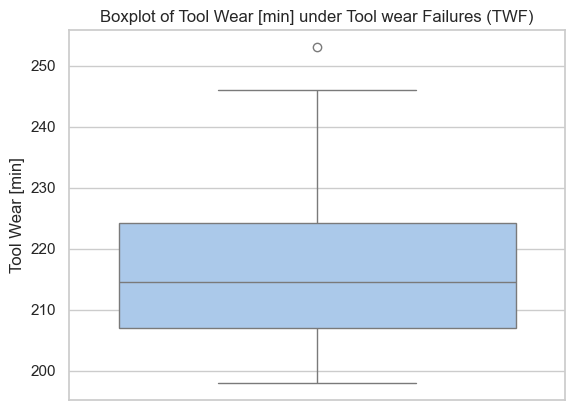

In [1219]:
sns.boxplot(y=tool_wear_failures['Tool wear [min]'])
plt.title("Boxplot of Tool Wear [min] under Tool wear Failures (TWF)")
plt.ylabel("Tool Wear [min]")
plt.show()

In [1220]:
operational_variables = ['Air temperature [K]', 'Process temperature [K]', 'Torque [Nm]', 'Tool wear [min]', 'Rotational speed [rpm]']

In [1221]:
df_failure_modes=[heat_dissipation_failures,random_failures,tool_wear_failures,power_failures,overstrain_failures]

#### Bivariate Analysis of the various Failure modes

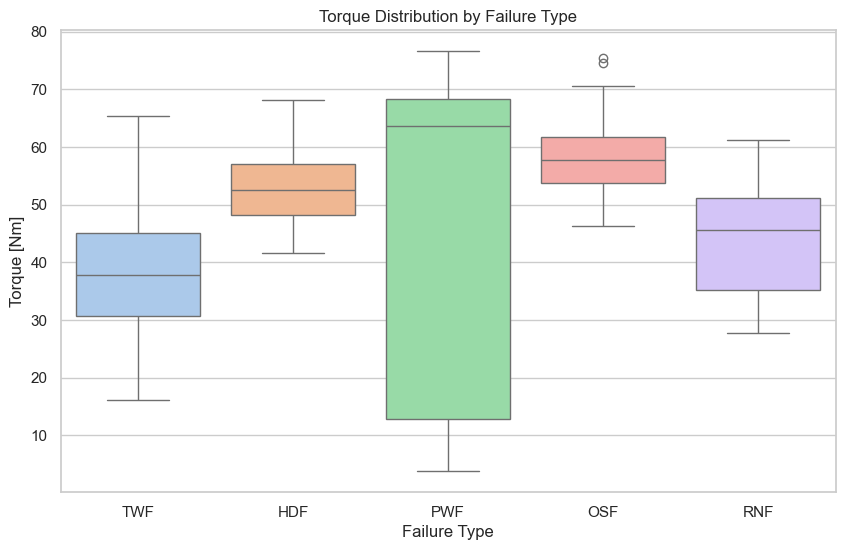

In [1222]:

df_melted = pd.DataFrame()

for failure_type in ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']:
    temp_df = df[df[failure_type] == 1].copy()
    temp_df['Failure Type'] = failure_type
    df_melted = pd.concat([df_melted, temp_df])

# Now plot, e.g., torque
plt.figure(figsize=(10,6))
sns.boxplot(data=df_melted, x='Failure Type',hue='Failure Type', legend=False, y='Torque [Nm]', palette='pastel')
plt.title('Torque Distribution by Failure Type')
plt.ylabel('Torque [Nm]')
plt.xlabel('Failure Type')
plt.show()

Insights:

- Torque monitoring is critical for predicting HDF and OSF, as these failures consistently occur at higher torque.

- PWF presents a challenge due to inconsistent torque ranges, suggesting it may be influenced by other variables or needs multi-variable modeling.

- You could define failure-specific torque thresholds to trigger preventive maintenance or alerts for certain failure types (e.g., above 60 Nm for HDF/OSF).


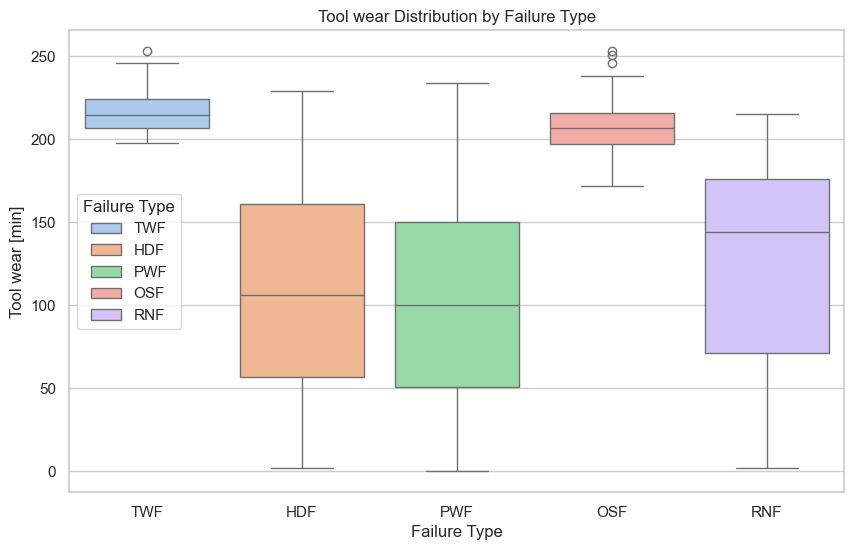

In [1223]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_melted, x='Failure Type', hue='Failure Type', legend=True,y='Tool wear [min]', palette='pastel')

plt.title('Tool wear Distribution by Failure Type')
plt.ylabel('Tool wear [min]')
plt.xlabel('Failure Type')
plt.show()

Insights:

- Preventive maintenance thresholds should be set for tool wear around 200–220 min to avoid TWF and OSF.

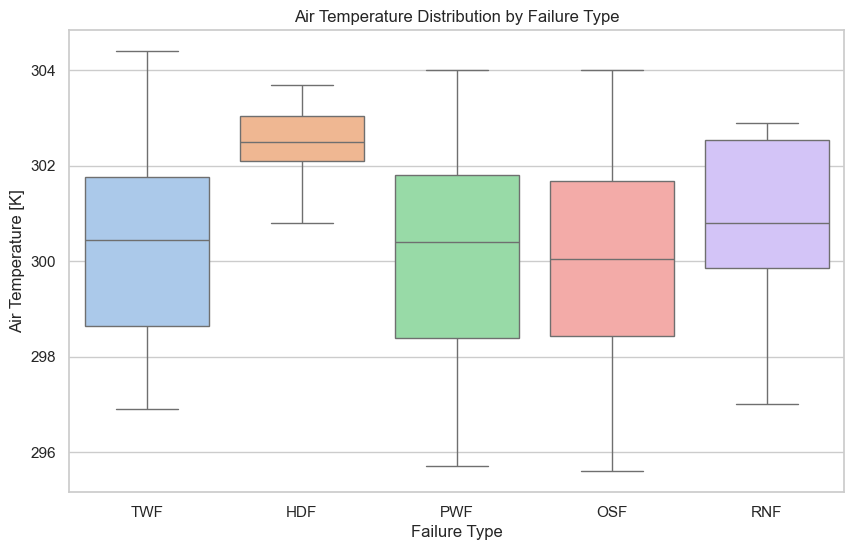

In [1224]:
#The next analysis is checking the influence of the air temperature on the various failure modes
plt.figure(figsize=(10,6))
sns.boxplot(data=df_melted, x='Failure Type',hue='Failure Type', legend=False, y='Air temperature [K]', palette='pastel')
plt.title("Air Temperature Distribution by Failure Type")
plt.xlabel("Failure Type")
plt.ylabel("Air Temperature [K]")
plt.show()

Insights:

- HDF can be proactively monitored and mitigated by ensuring adequate cooling systems and keeping air temperatures below ~302 K.

- The median values are all close to ~300 K, indicating little difference in central tendency.

- The interquartile ranges (IQRs) are relatively large, suggesting air temperature may not be a strong discriminating factor among these failures.

- For other failure types, air temperature alone isn’t a decisive indicator, implying that maintenance planning should consider multi-variable interactions (like tool wear, torque, etc.) rather than just temperature.

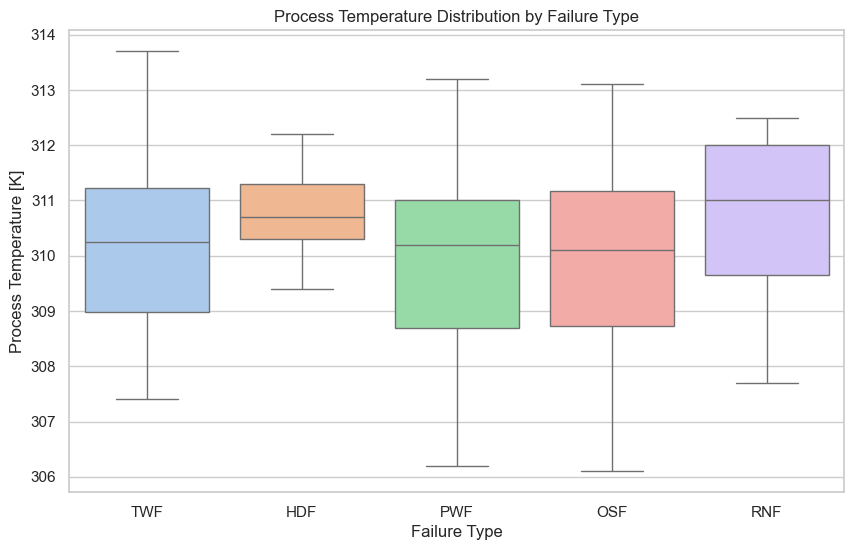

In [1225]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_melted, x='Failure Type', hue='Failure Type', legend=False,y='Process temperature [K]', palette='pastel')
plt.title("Process Temperature Distribution by Failure Type")
plt.xlabel("Failure Type")
plt.ylabel("Process Temperature [K]")
plt.show()

Insights:

- All failure types show similar median process temperatures around 310 K, indicating that this variable may not be a strong discriminator between failure types

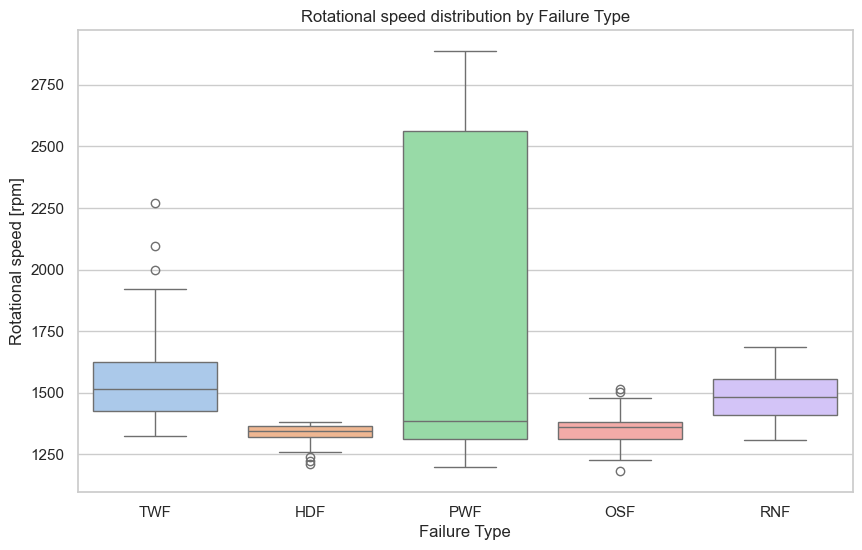

In [1226]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_melted, x='Failure Type', hue='Failure Type', legend=False,y='Rotational speed [rpm]',palette='pastel')
plt.title("Rotational speed distribution by Failure Type")
plt.xlabel("Failure Type")
plt.ylabel("Rotational speed [rpm]")
plt.show()

Insights:

- PWF (Power Failures):
Shows the widest spread in rotational speed.
Covers both very low and high rpm values (from ~1200 to nearly 2800 rpm).
Indicates instability in rotational speed might be a key factor in power failures.

- TWF and RNF:
Moderate spread in rotational speeds.
Medians hover around 1450–1500 rpm.
Suggests these failures occur within a relatively normal range, but with room for fluctuation.

- HDF and OSF:
Most stable and lowest variance in rotational speeds.
Speeds are tightly packed around ~1300–1350 rpm.
Possibly suggests these failures occur under stable yet thermally stressful conditions (e.g., overheating with low airflow).

In [1227]:
#From here , I went on to further test the relationship between air temperature and process temperature to observe their influence on the various failure modes

<Axes: xlabel='Air temperature [K]', ylabel='Process temperature [K]'>

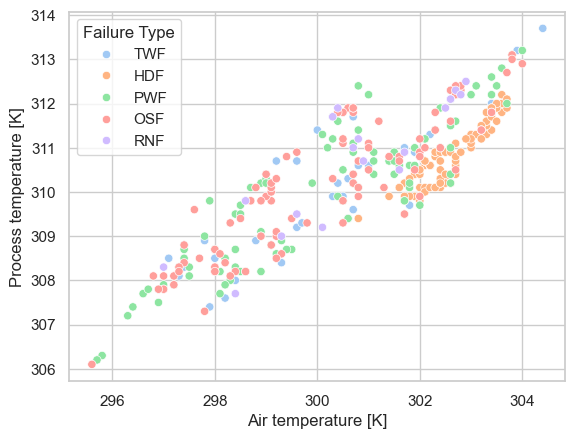

In [1228]:
# Bivariate analysis of both air operational variables

sns.scatterplot(data=df_melted, x='Air temperature [K]', y='Process temperature [K]', hue='Failure Type')

Insights:

1. Strong Positive Correlation:
- As air temperature increases, process temperature also increases almost linearly.
- This implies that process temperature is highly dependent on air temperature, likely due to lack of proper cooling or thermal regulation.
    
2.	Failure Types Spread Across the Range:
- All failure types (TWF, HDF, PWF, OSF, RNF) are evenly distributed along this diagonal trend.
- No specific failure type dominates any single temperature range, indicating that temperature alone does not directly determine failure type.

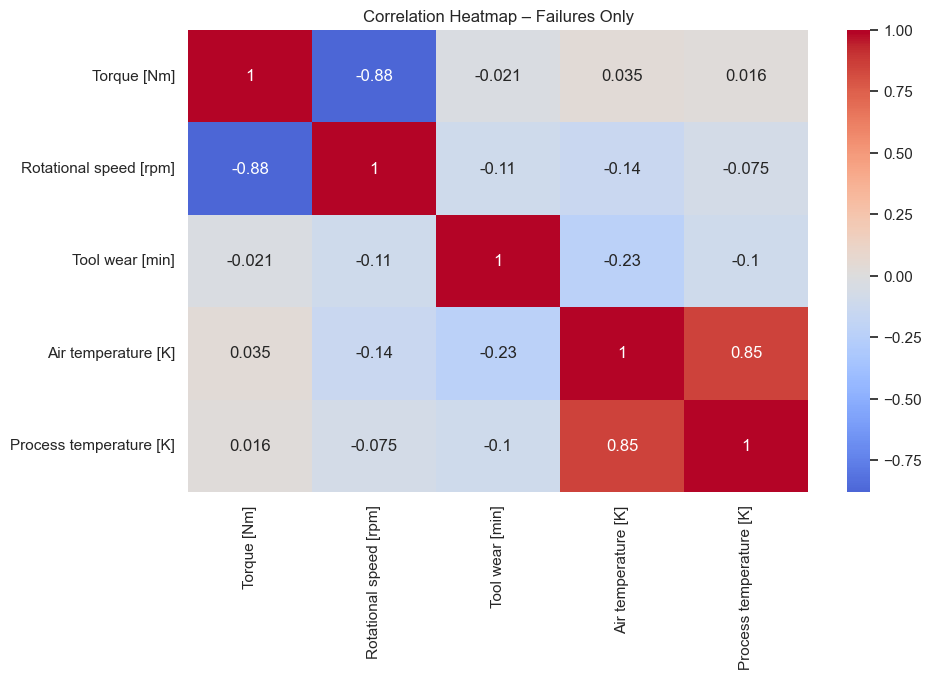

In [1229]:
## After this i tested , to see correlation between the various operational variables 
# to observe if any of these variables strongly correlate with each other for future 
# comparisons

failure_df = df[df['Machine failure'] == 1]  
corr = failure_df[['Torque [Nm]', 'Rotational speed [rpm]', 'Tool wear [min]', 
                   'Air temperature [K]', 'Process temperature [K]']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap – Failures Only')
plt.show()

Insights 

Correlation = -0.88

1.	Torque and Rotational Speed are Strongly Inversely Correlated
Higher torque tends to occur with lower rotational speeds during failures — a mechanical load-pressure indicator.
This is a critical failure signal and should be closely compared with success data.


Correlation = +0.85

2.	Air and Process Temperatures Rise Together
Failures often involve simultaneous increases in air and process temperatures, suggesting thermal stress or overheating may be a common failure condition.

3. Tool Wear is Weakly Related to Other Variables
⬇️ Correlations with temperature and torque/speed are weak (all below ±0.25).
Tool wear likely contributes to failures independently and must be evaluated on its own through distribution/threshold analysis.


In [1230]:
corr_matrix = df[operational_variables].corr()

## Success Analysis (Univariate and Bivariate)

In [1231]:
#The condition for success is such that the machine failure variable is set to 0. Meaning all failures modes are set to 0 and do not have an influence on any of the operational conditions

In [1232]:
df_success

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_numerical,Product_ID_numerical
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,1,14860
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,0,47181
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,0,47182
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,0,47183
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,0,47184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0,1,24855
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0,2,39410
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0,1,24857
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0,2,39412


In [1233]:
# Success Values here represent a dataframe consisting of all operational values where machine success was prevalent
#The necessary operational values where filtered out of the orignal dataframe

In [1234]:
success_values=df_success[['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]', 'Tool wear [min]']]

In [1235]:
success_values

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,298.1,308.6,1551,42.8,0
1,298.2,308.7,1408,46.3,3
2,298.1,308.5,1498,49.4,5
3,298.2,308.6,1433,39.5,7
4,298.2,308.7,1408,40.0,9
...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14
9996,298.9,308.4,1632,31.8,17
9997,299.0,308.6,1645,33.4,22
9998,299.0,308.7,1408,48.5,25


In [1236]:
#The same steps for machine failure were repeated here for machine success

In [1237]:
success_percentage = df['Machine failure'].value_counts(normalize=True).sort_index() * 100

success_df = success_percentage.reset_index()
success_df.columns = ['Success_Status', 'Percentage']

success_df['Success_Status'] = success_df['Success_Status'].map({0: 'Success', 1: 'Failure'})

### Univariate and Bivariate Analysis of Machine Success

In [1238]:
machine_success_df = df[df['Machine failure'] == 0].copy()

In [1239]:
machine_success_df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_numerical,Product_ID_numerical
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,1,14860
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,0,47181
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,0,47182
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,0,47183
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,0,47184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0,1,24855
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0,2,39410
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0,1,24857
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0,2,39412


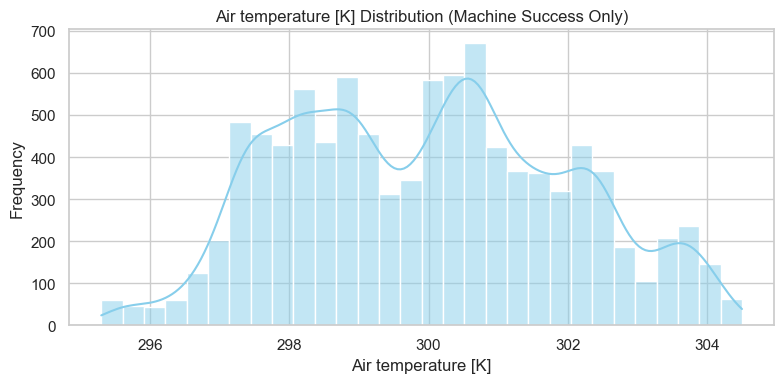

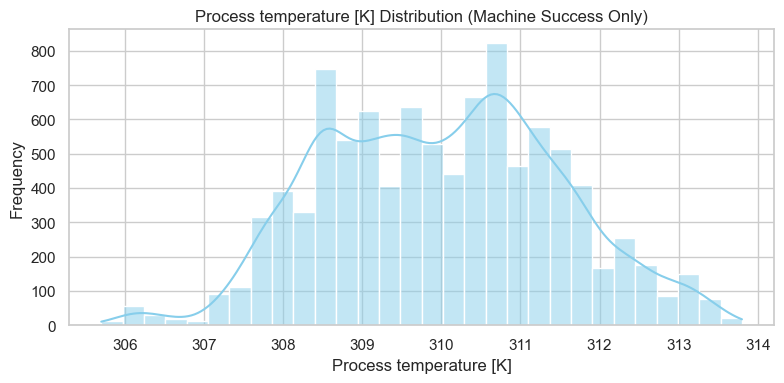

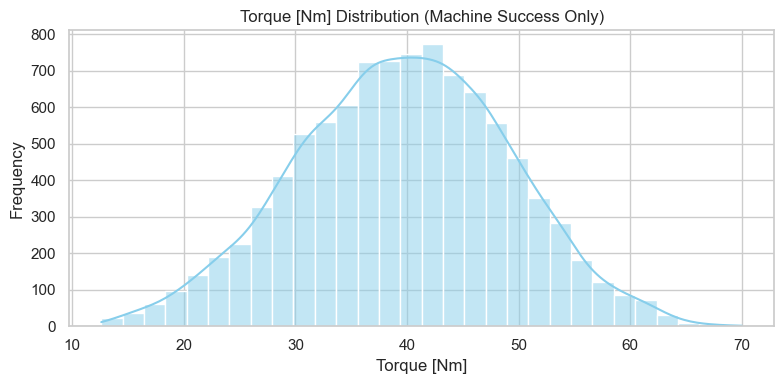

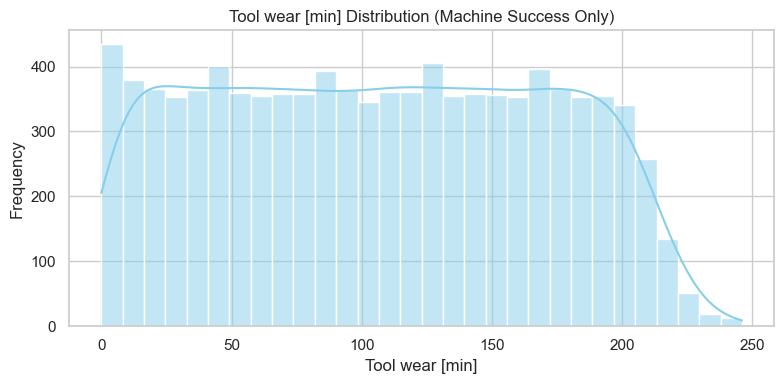

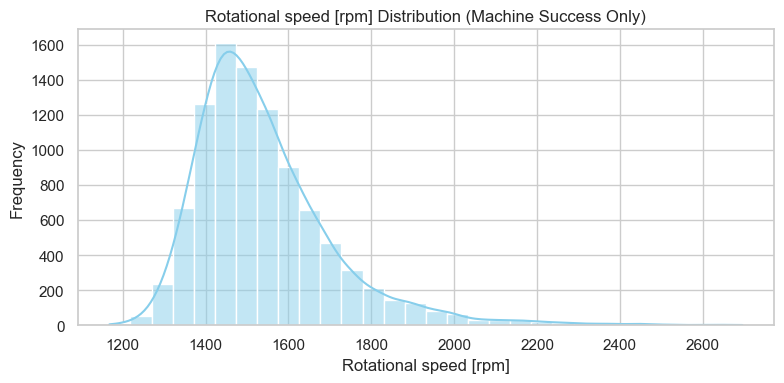

In [1240]:
#in order to have an overview of all the operational values for machine success i created 
#a list containing these columns.
#the for loop , loops between each column name and displays a histogram using the corresponding values from
#the machine_success_df dataframe
operational_variables = ['Air temperature [K]', 'Process temperature [K]', 
                    'Torque [Nm]', 'Tool wear [min]', 'Rotational speed [rpm]']

for var in operational_variables:
    plt.figure(figsize=(8, 4))
    sns.histplot(machine_success_df[var], kde=True, bins=30, color='skyblue')
    plt.title(f'{var} Distribution (Machine Success Only)')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

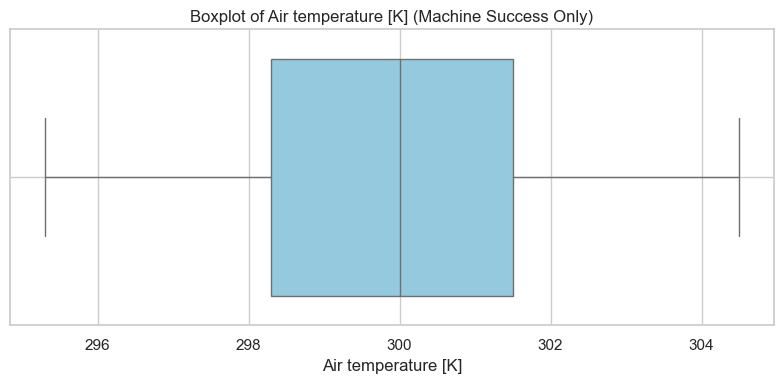

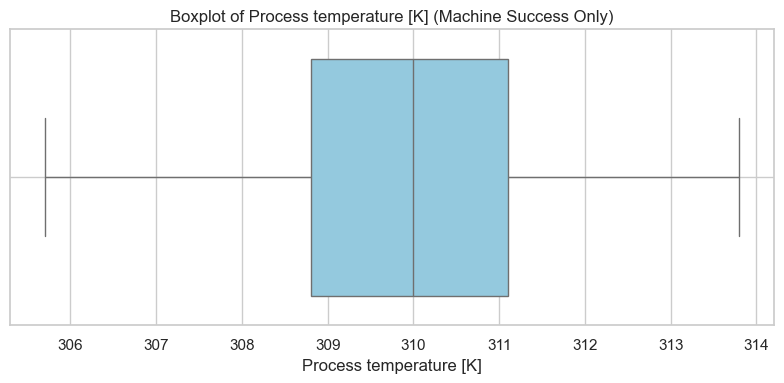

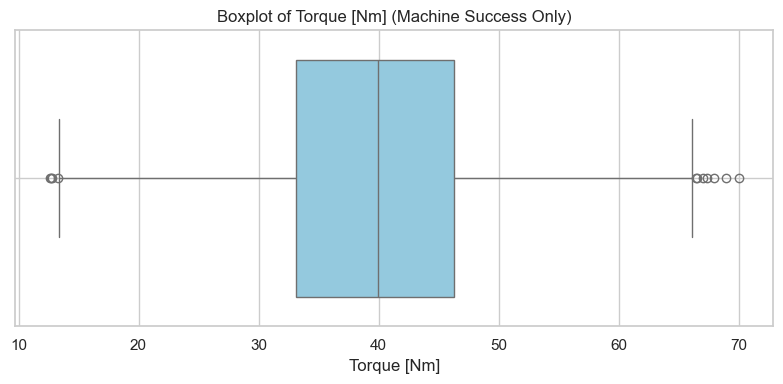

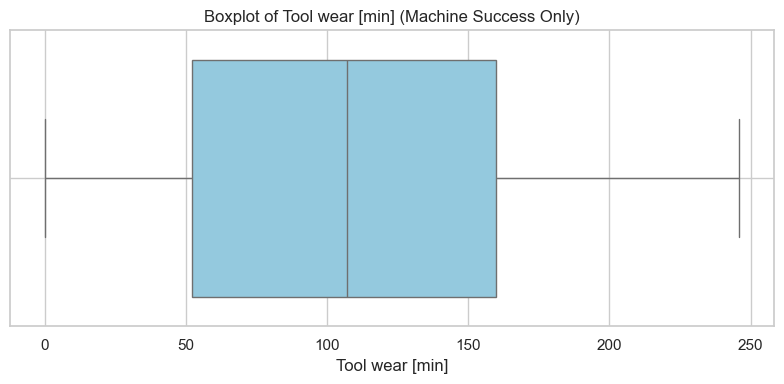

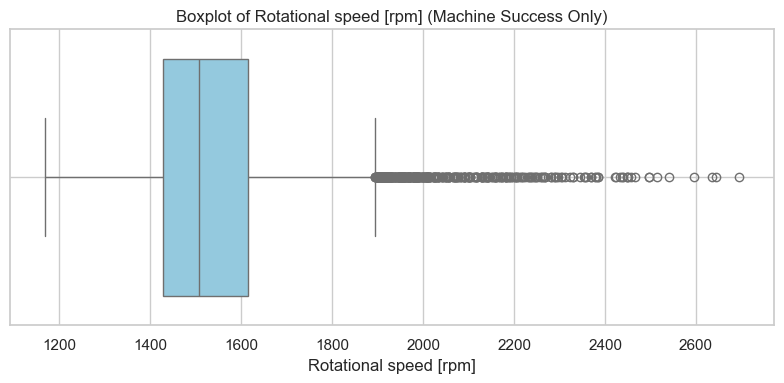

In [1241]:
# the same step was applied here to visualize the same graphs as a boxplot
#this was done in order to give a variety of visual observations in order to 
#determine the threshold of each operational variable

operational_variables = ['Air temperature [K]', 'Process temperature [K]', 
                         'Torque [Nm]', 'Tool wear [min]', 'Rotational speed [rpm]']

for var in operational_variables:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=machine_success_df[var], color='skyblue')
    plt.title(f'Boxplot of {var} (Machine Success Only)')
    plt.xlabel(var)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

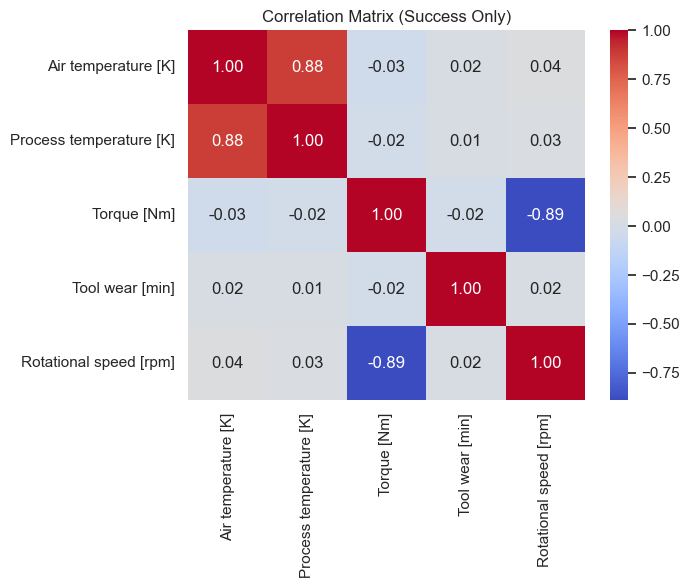

In [1242]:
#A correlation matrix was created here for the operational variables under machine success in 
#order to compare the relationship between the correlations of machine failure and machine success
# This was done similarly to the failure matrix for correlation
success_corr = machine_success_df[operational_variables].corr()

sns.heatmap(success_corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix (Success Only)")
plt.show()

In [1243]:
df.groupby('Machine failure')[operational_variables].mean().T

Machine failure,0,1
Air temperature [K],299.973999,300.886431
Process temperature [K],309.995570,310.290265
Torque [Nm],39.629655,50.168142
Tool wear [min],106.693717,143.781711
Rotational speed [rpm],1540.260014,1496.486726


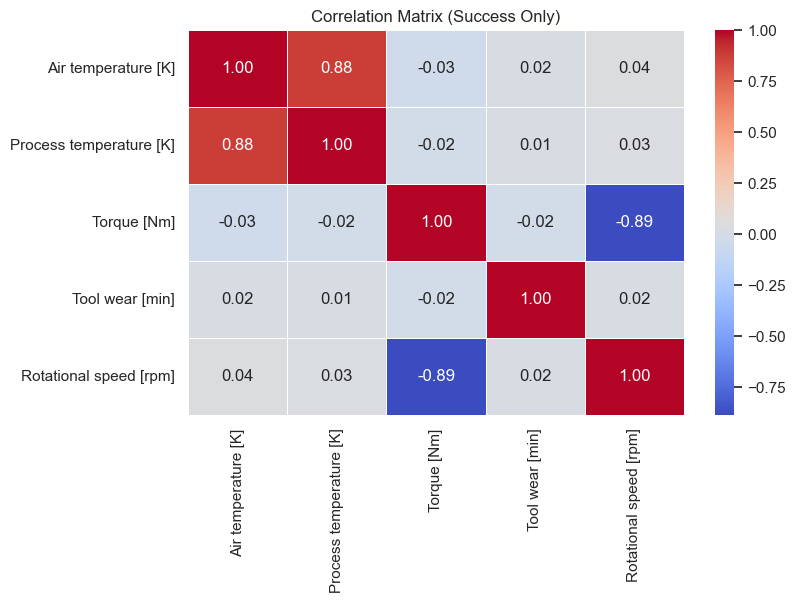

In [1244]:
operational_vars = ['Air temperature [K]', 'Process temperature [K]', 
                    'Torque [Nm]', 'Tool wear [min]', 'Rotational speed [rpm]']

corr_success = machine_success_df[operational_vars].corr()

plt.figure(figsize=(8, 5))
sns.heatmap(corr_success, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix (Success Only)")
plt.show()

### Visual comparisons between Machine success and failures

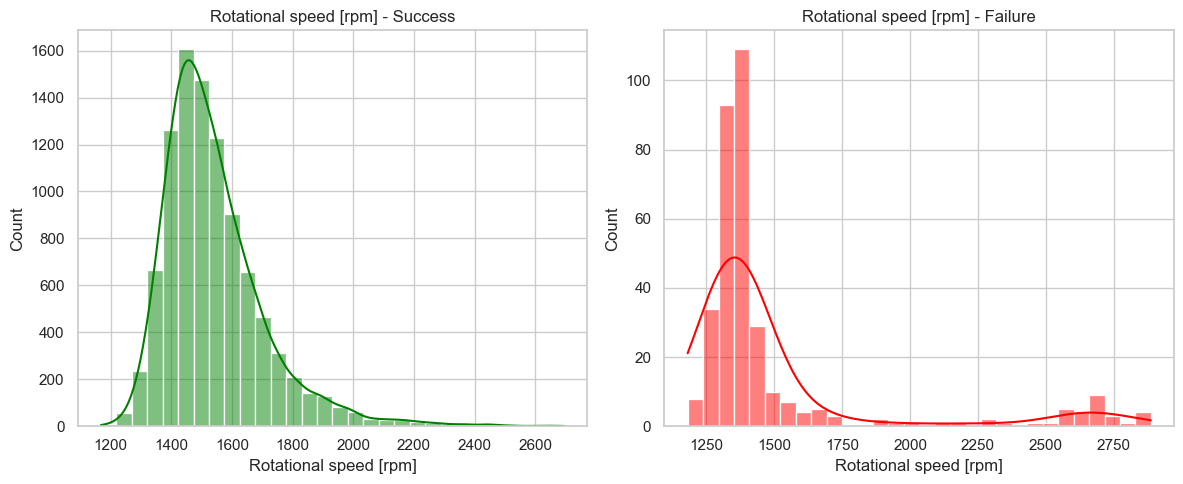

In [1245]:
# The goal her was to compare machine success and failures side by side in order to determine threshold points between the two for each operational 
#variable , which in turn would help in with failure predictions
feature = 'Rotational speed [rpm]'
plt.figure(figsize=(12, 5))

# This figure represents machine Success scenarios under the operational variable Rotational
# speed (machine_failure == 0)
plt.subplot(1, 2, 1)
sns.histplot(df_success[feature], bins=30, kde=True, color='green')
plt.title(f'{feature} - Success')
plt.xlabel(feature)
plt.ylabel('Count')
plt.grid(True)

#This figure represents machine Failure scenarios under the operational variable Rotational
# speed (machine_failure == 1)
plt.subplot(1, 2, 2)
sns.histplot(df_failures[feature], bins=30, kde=True, color='red')
plt.title(f'{feature} - Failure')
plt.xlabel(feature)
plt.ylabel('Count')
plt.grid(True)

plt.tight_layout()
plt.show()

Insights

-   Machines that operate within 1350 to 1700 rpm have significantly higher success rates.
	Outside this band, especially extremely high rpm, leads to a sharp rise in failure.
	This pattern suggests that very high rotational stress or too little momentum may be problematic.

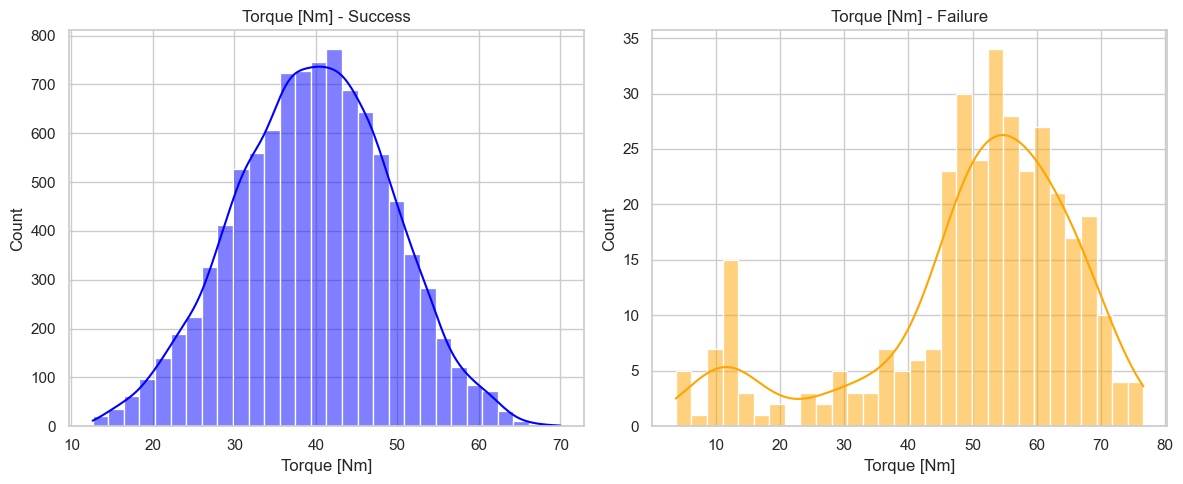

In [1246]:
feature = 'Torque [Nm]'


plt.figure(figsize=(12, 5))

# This figure represents machine Success scenarios under the operational variable Torque
# (machine_failure == 0)
plt.subplot(1, 2, 1)
sns.histplot(df_success[feature], bins=30, kde=True, color='blue')
plt.title(f'{feature} - Success')
plt.xlabel(feature)
plt.ylabel('Count')
plt.grid(True)

#This figure represents machine Failure scenarios under the operational variable Torque
# (machine_failure == 1)
plt.subplot(1, 2, 2)
sns.histplot(df_failures[feature], bins=30, kde=True, color='orange')
plt.title(f'{feature} - Failure')
plt.xlabel(feature)
plt.ylabel('Count')
plt.grid(True)

plt.tight_layout()
plt.show()

Insights

-  ✅ Safe
less than 45 Nm
Dominated by successful outcomes

- ⚠️ Caution
45 to 55 Nm
Overlap zone – increased risk begins

- ❌ High Risk
above 55 Nm
Strong presence of failures; failure rate increases sharply


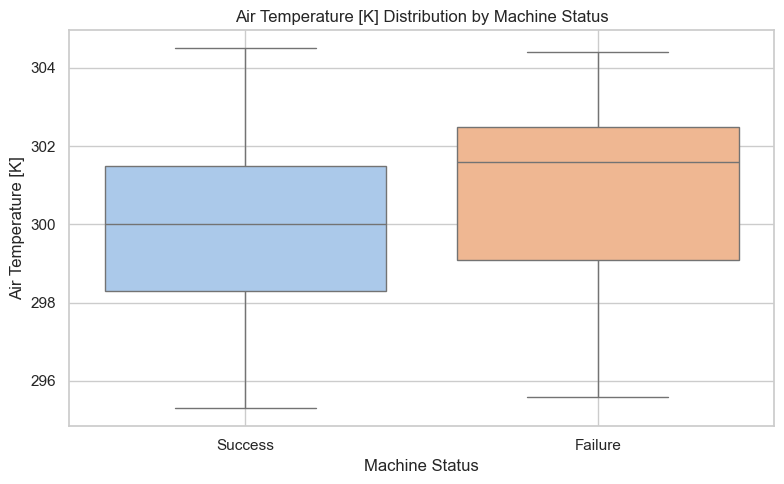

In [1247]:
# In order to compare the graphs for both machine success and failure under the operational variable air temperature
# I created the dataframe df_air_temp which consists of the air temperature values as well as every other operational value in the row 
df_air_temp = df[['Air temperature [K]', 'Machine failure']].copy()
df_air_temp['Status'] = df_air_temp['Machine failure'].map({0: 'Success', 1: 'Failure'})

plt.figure(figsize=(8, 5))
sns.boxplot(x='Status', y='Air temperature [K]', hue='Status',legend=False, data=df_air_temp, palette='pastel')
plt.title('Air Temperature [K] Distribution by Machine Status')
plt.xlabel('Machine Status')
plt.ylabel('Air Temperature [K]')
plt.grid(True)
plt.tight_layout()
plt.show()

Insights 
 
Threshold Recommendation:

- Safe range: 298 K to 302 K

- Critical high-risk threshold: > 303.2 K

- Monitoring zone: > 302 K (early warning)

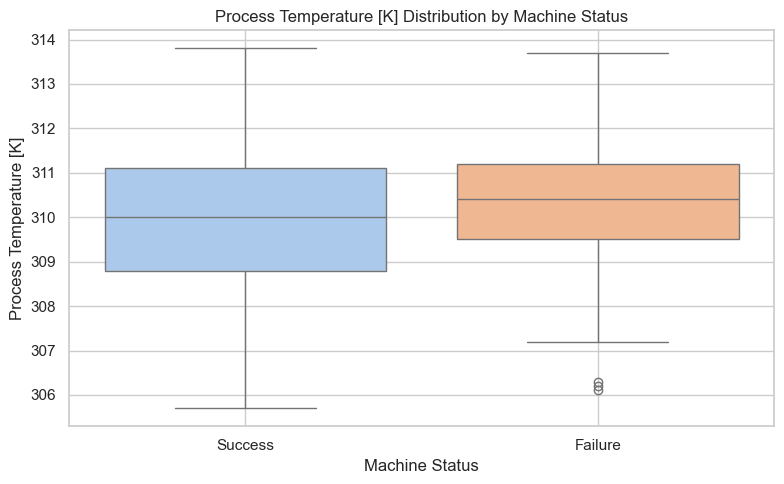

In [1248]:
# The same process was repeated here for the process temperature
df_process_temp = df[['Process temperature [K]', 'Machine failure']].copy()
df_process_temp['Status'] = df_process_temp['Machine failure'].map({0: 'Success', 1: 'Failure'})

plt.figure(figsize=(8, 5))
sns.boxplot(x='Status', y='Process temperature [K]', hue='Status',legend=False, data=df_process_temp, palette='pastel')
plt.title('Process Temperature [K] Distribution by Machine Status')
plt.xlabel('Machine Status')
plt.ylabel('Process Temperature [K]')
plt.grid(True)
plt.tight_layout()
plt.show()

Insights

- Machines operating within 309 K – 311 K are most likely to succeed.

- Deviations outside this narrow range may significantly increase the probability of failure, especially when reaching below 307.5 K or above 312.5 K.

- Maintaining thermal stability should be a key focus in predictive maintenance and control systems.

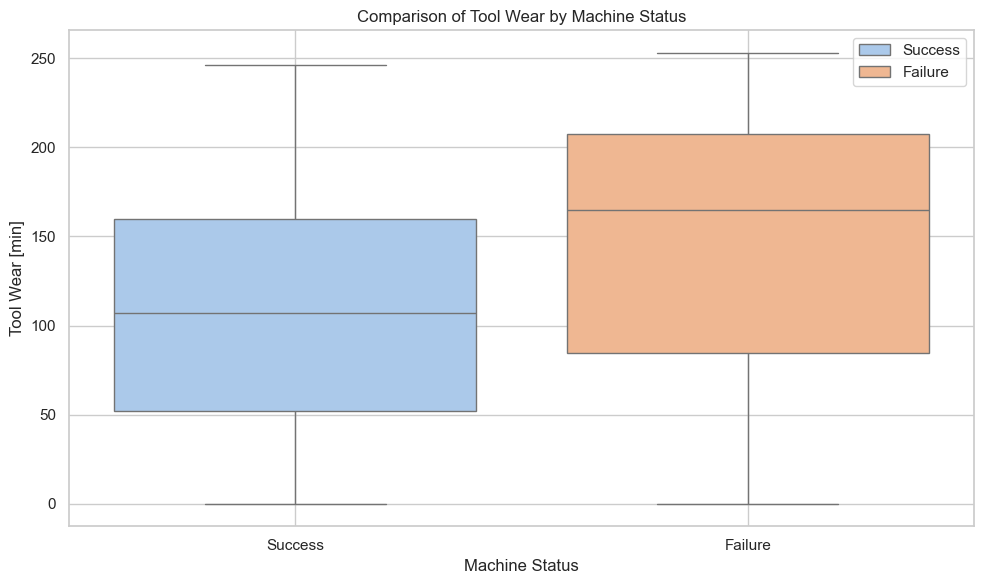

In [1249]:
#Same process was repeated for the tool wear
df['Machine Status'] = df['Machine failure'].map({0: 'Success', 1: 'Failure'})

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Machine Status',hue='Machine Status',legend=True, y='Tool wear [min]', palette='pastel')


# Plot settings
plt.title('Comparison of Tool Wear by Machine Status')
plt.ylabel('Tool Wear [min]')
plt.xlabel('Machine Status')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Insights
- 🟢 Safe
0–160 min
High probability of success

- 🟡 Caution
160–200 min
Mixed zone, failure rate increases

- 🔴 Risk Zone
above 200 min
High risk of TWF and OSF failures


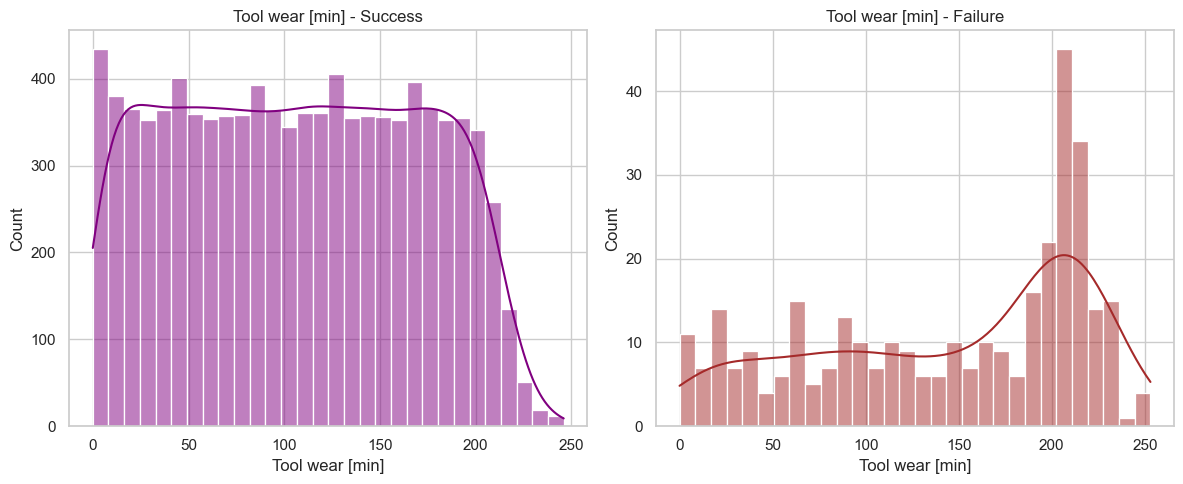

In [1250]:
# A similar process was repeated here from the histogram comparisons in order to give visual variations of the comparison 
feature = 'Tool wear [min]'


plt.figure(figsize=(12, 5))

# This figure represents machine Success scenarios under the operational variable Tool wear
# (machine_failure == 0)
plt.subplot(1, 2, 1)
sns.histplot(df_success[feature], bins=30, kde=True, color='purple')
plt.title(f'{feature} - Success')
plt.xlabel(feature)
plt.ylabel('Count')
plt.grid(True)

#This figure represents machine Failure scenarios under the operational variable Tool wear
# (machine_failure == 1)
plt.subplot(1, 2, 2)
sns.histplot(df_failures[feature], bins=30, kde=True, color='brown')
plt.title(f'{feature} - Failure')
plt.xlabel(feature)
plt.ylabel('Count')
plt.grid(True)

plt.tight_layout()
plt.show()

## Predictive Maintenance & Failure Prevention through Operational Threshold Analysis


### How do different operational variables (like torque, rotational speed, tool wear, air and process temperature) influence machine failures, and what thresholds can we establish to distinguish between normal and failure-prone operating conditions?”

#### Business Objective:
#### To minimize downtime and optimize machine performance by identifying:	Which variables are most associated with machine failures ,What value ranges (thresholds) define a safe operating window ,How to flag risk conditions early using real-time data


#### Questions relating to EDA Analysis

##### 1.	Which failure mode occurs most frequently in the dataset?

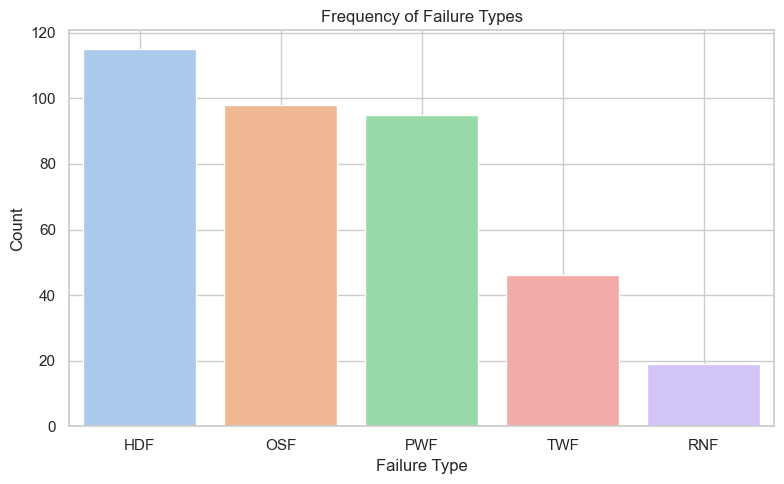

In [1251]:
failure_types = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
failure_counts = df[failure_types].sum().sort_values(ascending=False)

# Create a barplot
plt.figure(figsize=(8, 5))
sns.barplot(x=failure_counts.index, hue=failure_counts.index, legend=False, y=failure_counts.values, palette="pastel")
plt.title("Frequency of Failure Types")
plt.ylabel("Count")
plt.xlabel("Failure Type")
plt.grid(True)
plt.tight_layout()
plt.show()

The heat dissipation failure is the most occuring failure mode.

##### 2.	What is the distribution of each operational variable (Torque, Tool Wear, Rotational Speed, Process and Air Temperature) across different failure types?

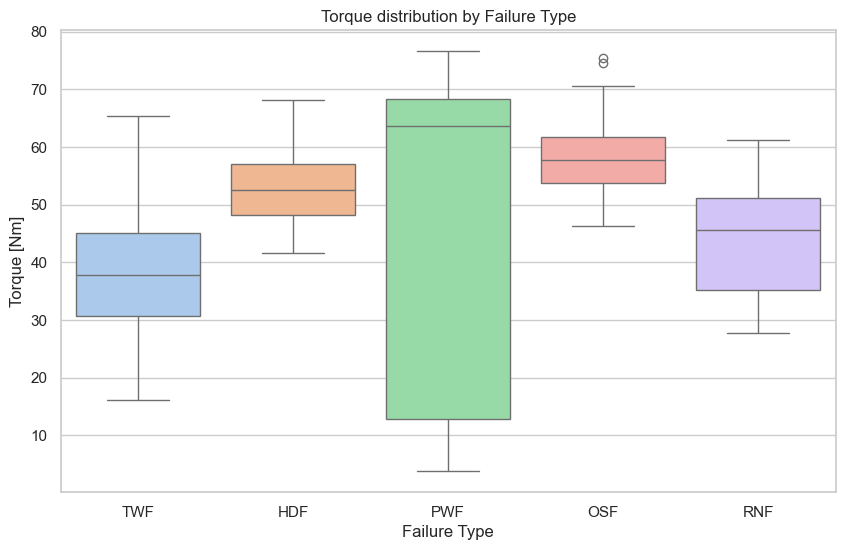

In [1252]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_melted, x='Failure Type',hue='Failure Type', legend=False, y='Torque [Nm]',palette='pastel')
plt.title("Torque distribution by Failure Type")
plt.xlabel("Failure Type")
plt.ylabel("Torque [Nm]")
plt.show()

- This is an example of Torque [Nm] across the different failure types

##### 3.Are there critical thresholds in operational variables beyond which failures occur more frequently?

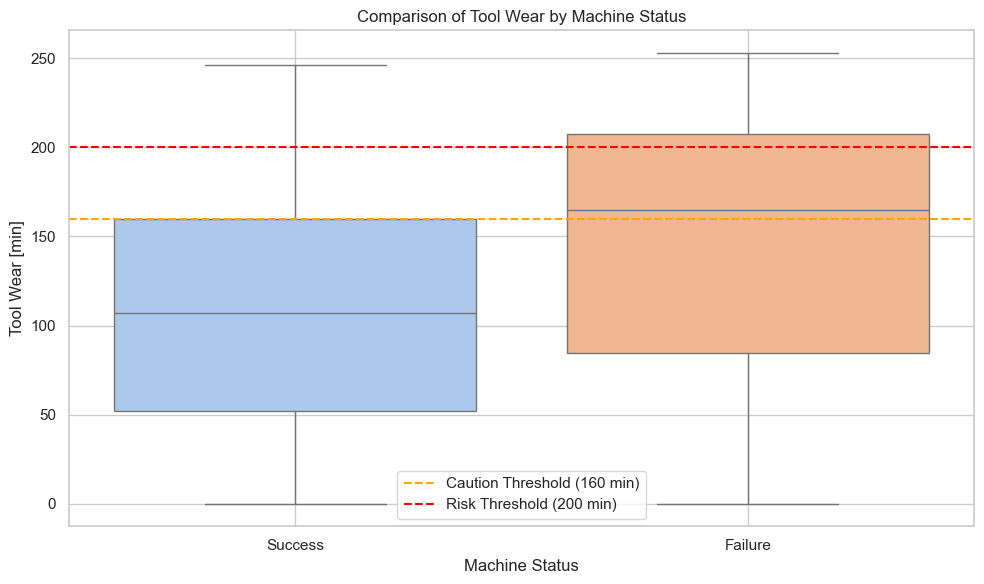

In [1253]:
df['Machine Status'] = df['Machine failure'].map({0: 'Success', 1: 'Failure'})

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Machine Status',hue='Machine Status',legend=False, y='Tool wear [min]', palette='pastel')

# Add threshold lines
plt.axhline(160, color='orange', linestyle='--', label='Caution Threshold (160 min)')
plt.axhline(200, color='red', linestyle='--', label='Risk Threshold (200 min)')

# Plot settings
plt.title('Comparison of Tool Wear by Machine Status')
plt.ylabel('Tool Wear [min]')
plt.xlabel('Machine Status')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Insight

- 3 main thresholds were identified specifically for the tool wear , rotational speed and torque operational variables. The Boxplot for tool wear clearly indicated potential failure thresholds. For example, machines that failed tended to have higher tool wear values above 200 minutes, and more extreme torque values compared to successful operations. This insight is essential for predictive maintenance and defining alert limits for operators

##### 4.Do machines of a specific product type (L, M, or H) fail more frequently?

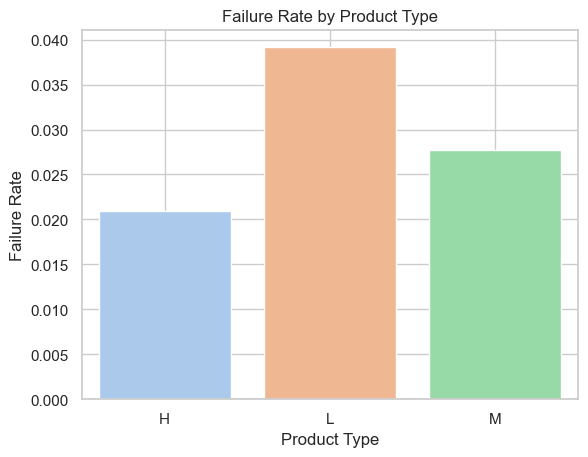

In [1254]:

# Group by type and calculate failure rate
failure_by_type = df.groupby('Type')['Machine failure'].mean().reset_index()

# Plot
sns.barplot(data=failure_by_type, x='Type',hue='Type',legend=False, y='Machine failure', palette='pastel')
plt.title('Failure Rate by Product Type')
plt.ylabel('Failure Rate')
plt.xlabel('Product Type')
plt.grid(True)
plt.show()

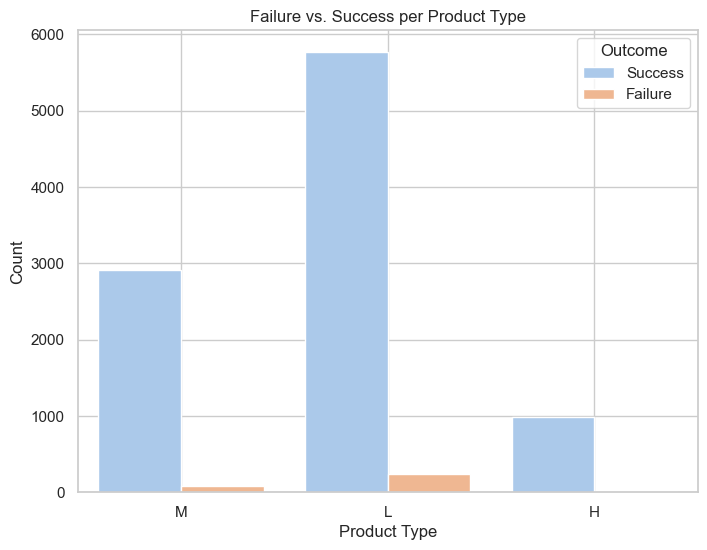

In [1255]:
# Create a column for labeling success/failure
df_combined = df.copy()
df_combined['Failure Label'] = df_combined['Machine failure'].map({0: 'Success', 1: 'Failure'})

# Plot count of failures per product type
plt.figure(figsize=(8, 6))
sns.countplot(data=df_combined, x='Type', hue='Failure Label', palette='pastel')
plt.title('Failure vs. Success per Product Type')
plt.ylabel('Count')
plt.xlabel('Product Type')
plt.grid(True)
plt.legend(title='Outcome')
plt.show()

Yes , Products of the L type seem to have more failures

##### 5.How are the failures spread across the various Product Types? 

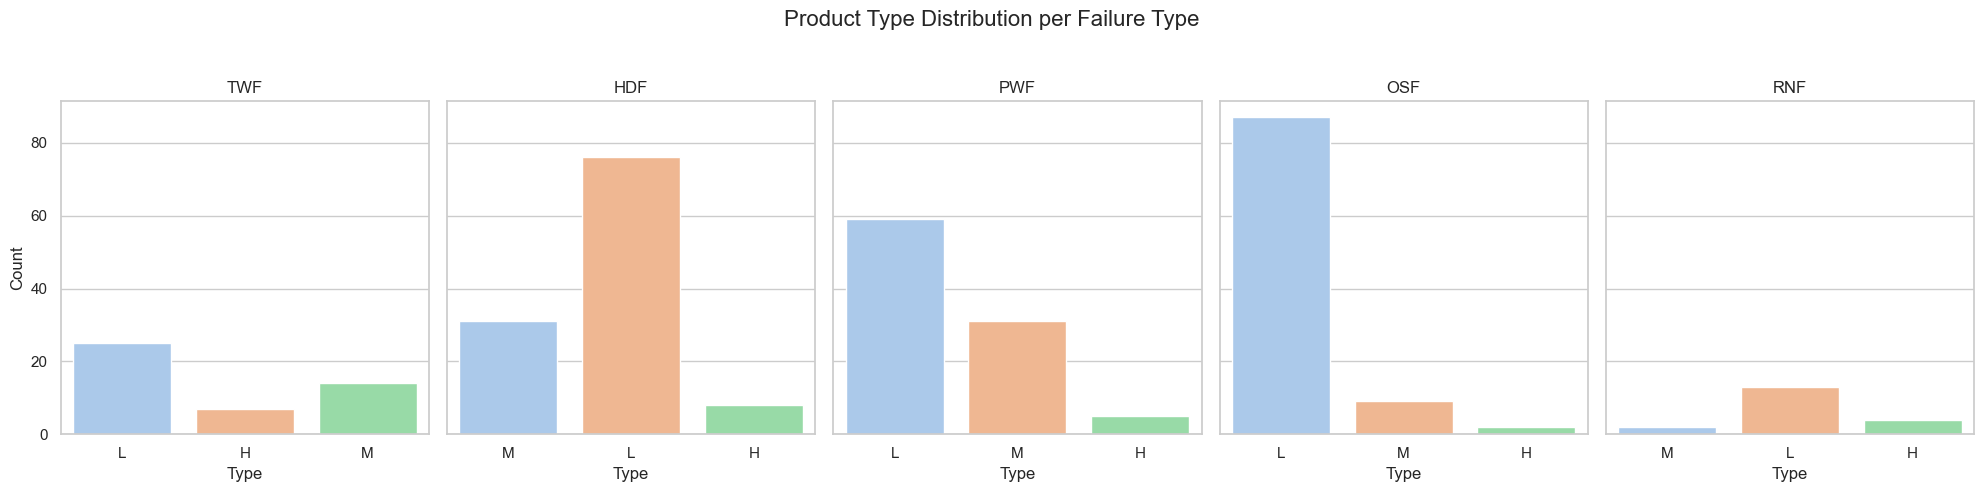

In [1256]:
failure_types = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']

# Create subplots
fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharey=True)

# Loop and plot
for i, failure in enumerate(failure_types):
    temp_df = df[df[failure] == 1]
    
    sns.countplot(
        data=temp_df,
        x='Type',
        hue='Type',             
        palette='pastel',
        legend=False,
        ax=axes[i]
    )
    
    axes[i].set_title(f'{failure}')
    axes[i].set_xlabel('Type')
    if i == 0:
        axes[i].set_ylabel('Count')
    else:
        axes[i].set_ylabel('')

# Add a global title
fig.suptitle('Product Type Distribution per Failure Type', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

1.	L-type products fail the most
-	Failures across all failure types are dominated by L-type products, especially in OSF, HDF, and PWF.

2.	H-type products are the most reliable
-	They have the fewest failures, indicating strong design or durability.

3.	Certain failures are product-specific 
-   Overstrain Failures (OSF) are heavily concentrated in L-type, suggesting mechanical weakness.
-   Heat Dissipation Failures (HDF) are also common in L-type, indicating thermal design issues.

4.	Potential design or quality issue in L-type
-   Consistent failure across all categories may point to a need for redesign, material upgrade, or quality control.
    
5.	Strategic recommendation

-   Reevaluate the cost-effectiveness of L-type products.
-   Consider shifting focus to M and H-types for better reliability and long-term customer satisfaction.

##### 6.Which operational variables are most strongly correlated with each other during machine failures

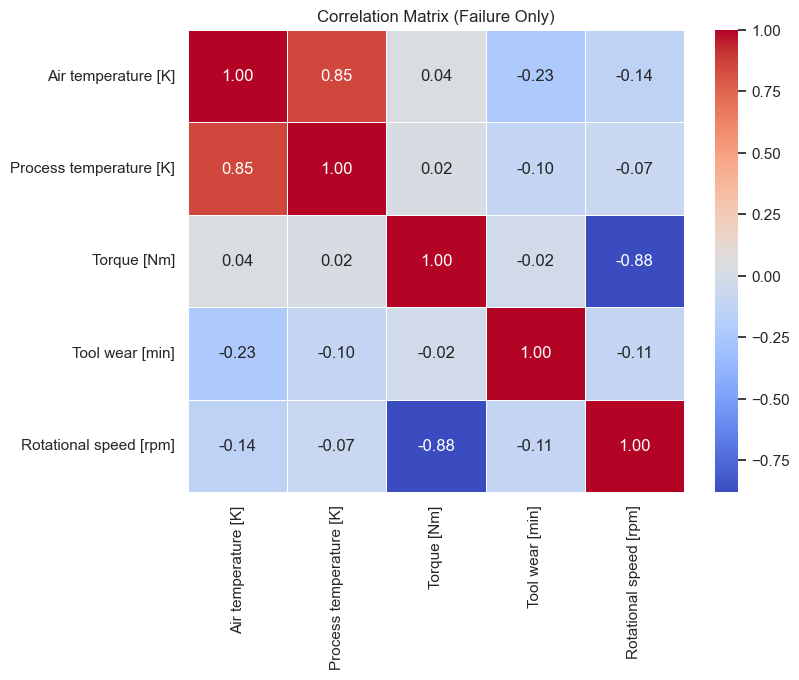

In [1257]:
corr_failure = df_failures[operational_vars].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_failure, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix (Failure Only)")
plt.show()

- Strongest postivie correlations are between air temperature and process temperature with 0.85

- Strongest negative correlations are between torque and rotational speed with -0.88

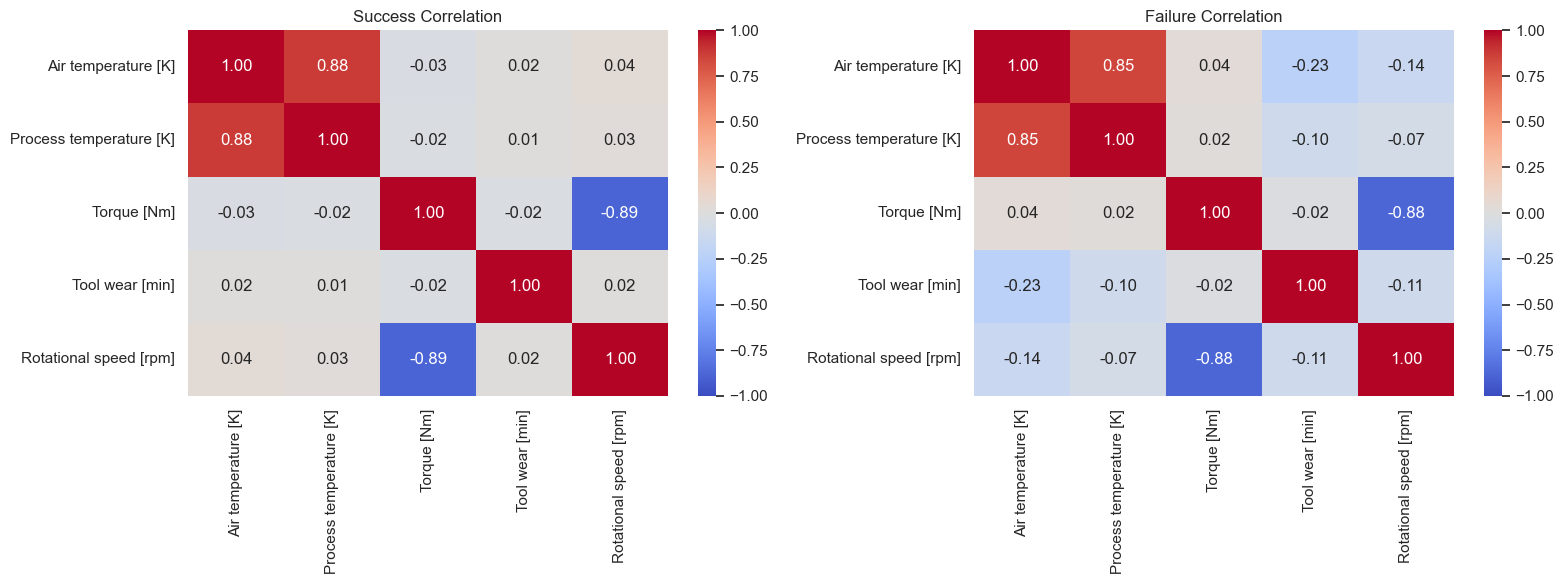

In [1258]:


# Compute correlation matrices
corr_success = machine_success_df[operational_vars].corr()
corr_failure = df_failures[operational_vars].corr()

# Shared color scale for direct comparison
vmin = -1
vmax = 1

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(corr_success, annot=True, fmt=".2f", cmap='coolwarm', vmin=vmin, vmax=vmax, ax=axes[0])
axes[0].set_title("Success Correlation")

sns.heatmap(corr_failure, annot=True, fmt=".2f", cmap='coolwarm', vmin=vmin, vmax=vmax, ax=axes[1])
axes[1].set_title("Failure Correlation")

plt.tight_layout()
plt.show()

- Most correlations stay the same in both success and failure scenarios with very little variations

##### 7. How does the relationship between torque and rotational speed influence the likelihood of machine failure?

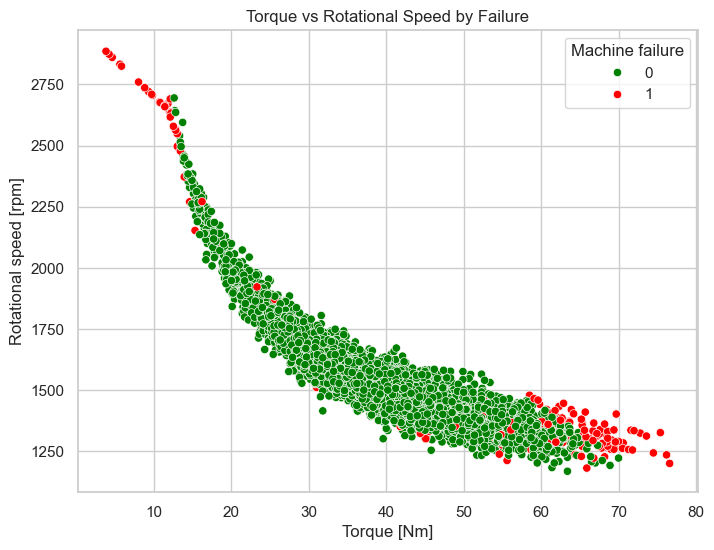

In [1259]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Torque [Nm]', y='Rotational speed [rpm]', 
                hue='Machine failure', palette={0: 'green', 1: 'red'})
plt.title('Torque vs Rotational Speed by Failure')
plt.grid(True)
plt.show()

- Monitoring combinations of high torque and low RPM, as well as low torque and high RPM, could allow early detection of stress conditions that lead to machine failure.

- There’s a clear inverse relationship between torque and rotational speed, which is typical of mechanical systems: applying more torque slows the machine down

- Safe Operating Zone:
- Most green (non-failure) observations are spread across the middle range (e.g., torque ~20–50 Nm and rpm ~1300–2200).


##### 8.Which operational variables are most correlated with machine failure

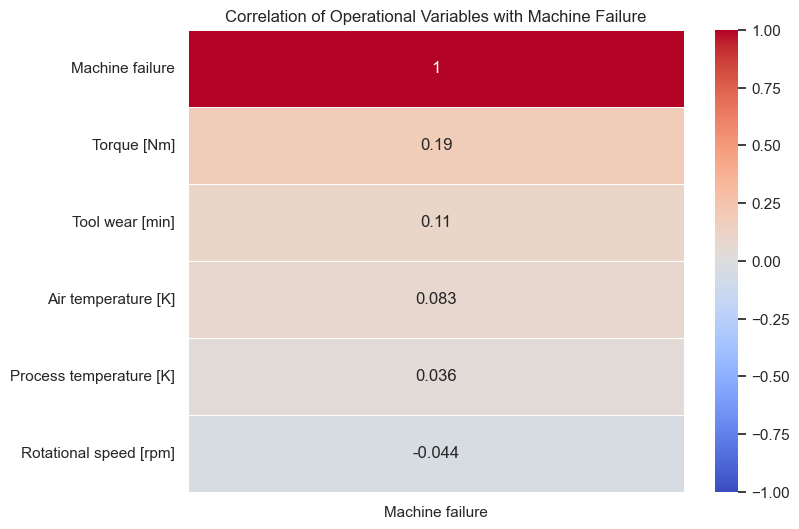

In [1260]:


# Select relevant columns including the binary 'Machine failure' column
cols_to_correlate = ['Air temperature [K]', 'Process temperature [K]', 
                     'Torque [Nm]', 'Tool wear [min]', 
                     'Rotational speed [rpm]', 'Machine failure']

# Compute correlation matrix
correlation_matrix = df[cols_to_correlate].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix[['Machine failure']].sort_values(by='Machine failure', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation of Operational Variables with Machine Failure')
plt.show()

- Torque has the strongest positive correlation with machine failure, suggesting machines operating under higher torque loads are more likely to fail.

- Rotational speed has a weak negative correlation implying that lower speeds might slightly induce more failures

##### 9.How do operational variables interact with each other, and how do those interactions differ between machine failures and successes?

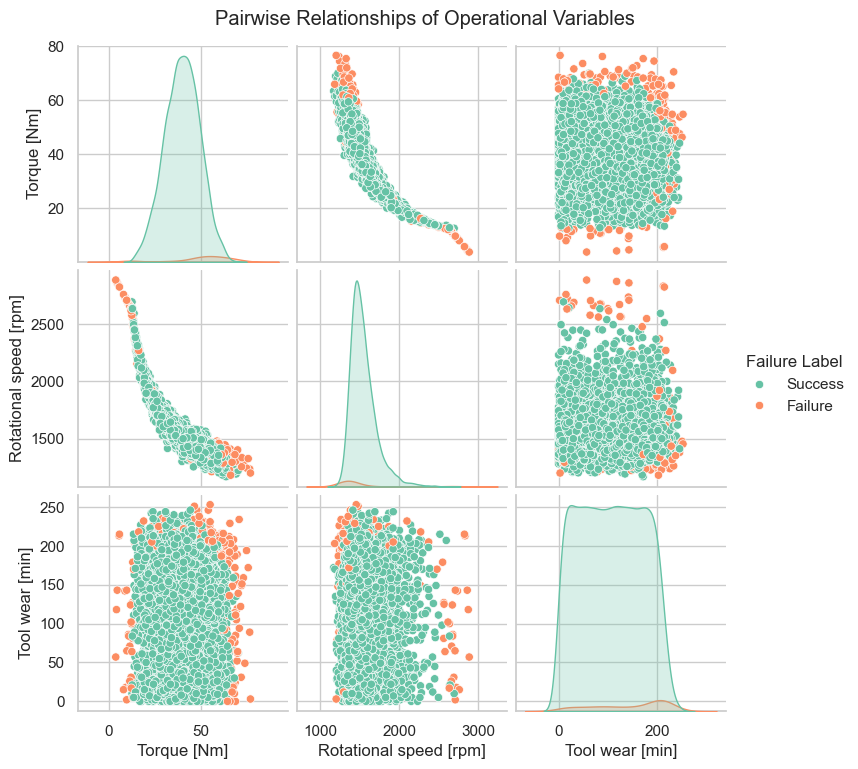

In [1261]:
# in order to observe the relation between various operational variables i opted for a 
#pairwise plot
features = ['Torque [Nm]', 'Rotational speed [rpm]', 'Tool wear [min]']
df_combined = df.copy()
df_combined['Failure Label'] = df_combined['Machine failure'].map({0: 'Success', 1: 'Failure'})

sns.pairplot(df_combined, vars=features, hue='Failure Label', palette='Set2')
plt.suptitle("Pairwise Relationships of Operational Variables", y=1.02)
plt.show()

- 	Failure-Prone Zones:
- High torque + low speed,
- High speed + low torque,
- High tool wear at any torque or speed.

1.	Torque vs Rotational Speed:
- Strong negative relationship.
- Failures (orange) cluster at low RPM + high torque and high RPM + low torque — already a known critical zone from earlier analysis.

2.	Tool Wear:
- Failures are evenly distributed across tool wear levels, but slightly more frequent at extremes (very high or low wear).
- Suggests wear alone isn’t a dominant driver — but in combination, it may be.

3.	Univariate Distributions (diagonals):
- Most variables have distinct density differences for failures vs successes.
- For example, torque is skewed higher in failure cases, RPM lower.

Interaction effects between torque and RPM are crucial failure indicators.

•	Monitoring joint behavior of torque and RPM can help predict early failure zones.

•	Future predictive models should incorporate interaction terms or non-linear relationships.

##### 10.How do the distributions of operational variables differ between successful operations and machine failures?

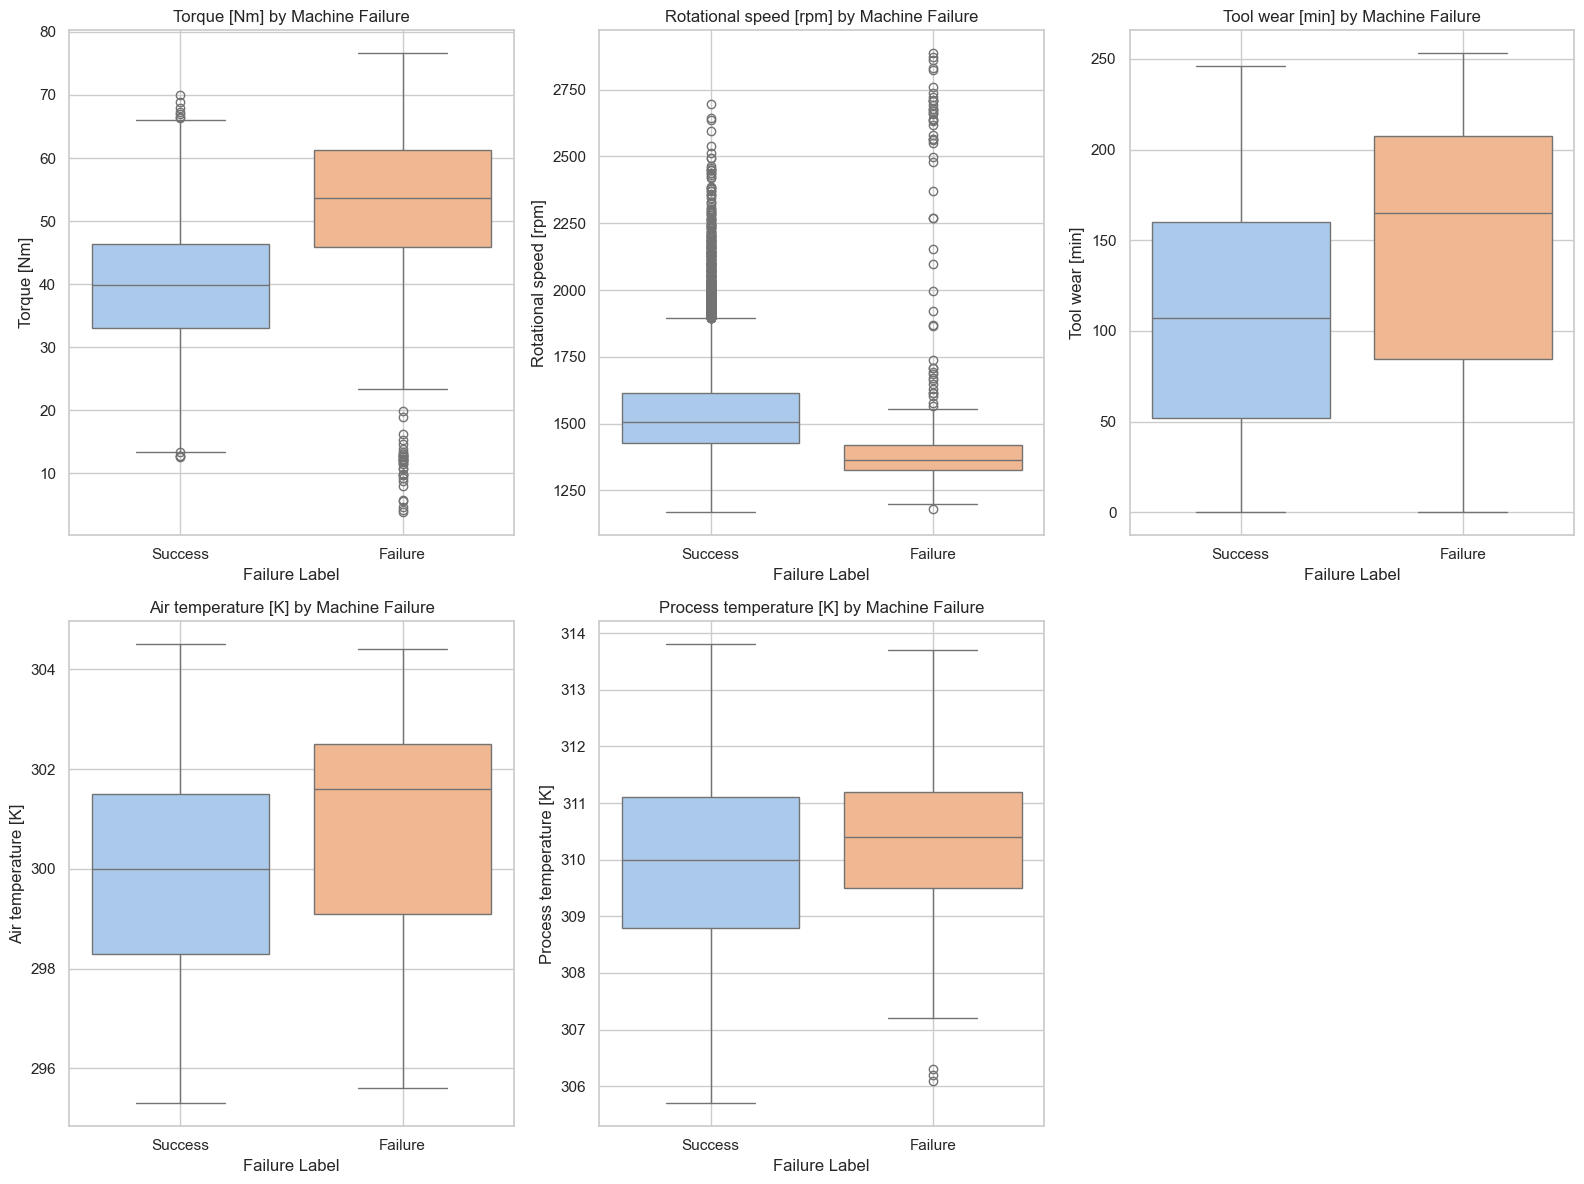

In [1262]:
# Copy DataFrame and add label
df_combined = df.copy()
df_combined['Failure Label'] = df_combined['Machine failure'].map({0: 'Success', 1: 'Failure'})

# Operational features to visualize
features = ['Torque [Nm]', 'Rotational speed [rpm]', 'Tool wear [min]', 
            'Air temperature [K]', 'Process temperature [K]']

# Set up subplots
plt.figure(figsize=(16, 12))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(
        data=df_combined,
        x='Failure Label',
        y=feature,
        hue='Failure Label',             # Added this line
        palette='pastel',
        legend=False                     # Suppress repeated legends
    )
    plt.title(f'{feature} by Machine Failure')
    plt.grid(True)

plt.tight_layout()
plt.show()

1.	Torque [Nm]:
•	Higher median torque values are associated with failures.
•	Threshold: Failures tend to increase above ~50 Nm.

2.	Rotational Speed [rpm]:
•	Failures mostly occur at lower speeds.
•	Threshold: Failures cluster below ~1450 rpm.

3.	Tool Wear [min]:
•	Failures occur more at extreme wear values, especially high wear.
•	Threshold: Elevated risk above ~180 min of wear.

4.	Air Temperature [K]:
•	Slightly higher median temperature in failures.
•	But overlap is significant; not a strong differentiator alone.

5.	Process Temperature [K]:
•	Medians for both are close; not a strong visual separator.


